In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothinng
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('DEXINUS.csv')
data

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [3]:
data = data.set_index('observation_date')

In [4]:
data

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


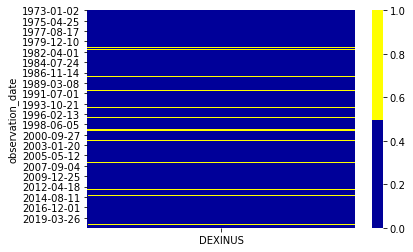

In [5]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

as we can see that te yellow is missing values so first fix the missing values

In [6]:
data.isnull().any()

DEXINUS    True
dtype: bool

In [7]:
data

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


In [8]:
data.fillna(method ='ffill', inplace = True)

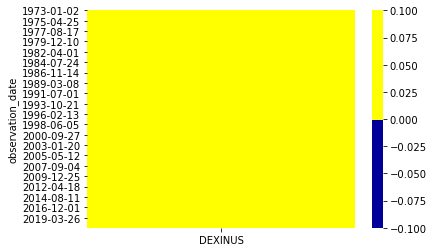

In [9]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [10]:
data.isnull().any()

DEXINUS    False
dtype: bool

In [11]:
data

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


So the missing values has been filled with the next consecutive value, why we did not drop the null values to reduce the 
rate of errors / influenced data

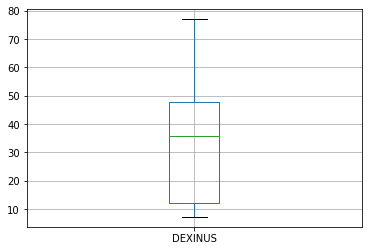

In [12]:
data.boxplot()

In [13]:
data['DEXINUS'].mean()

34.20711215115814

In [14]:
data['DEXINUS'].std()

21.113315278802908

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXINUS  12649 non-null  float64
dtypes: float64(1)
memory usage: 197.6+ KB


In [16]:
data.describe()

,DEXINUS
count,12649.000000
mean,34.207112
std,21.113315
min,7.190000
25%,12.070000
50%,35.890000
75%,47.660000
max,76.950000


lets visualize the data

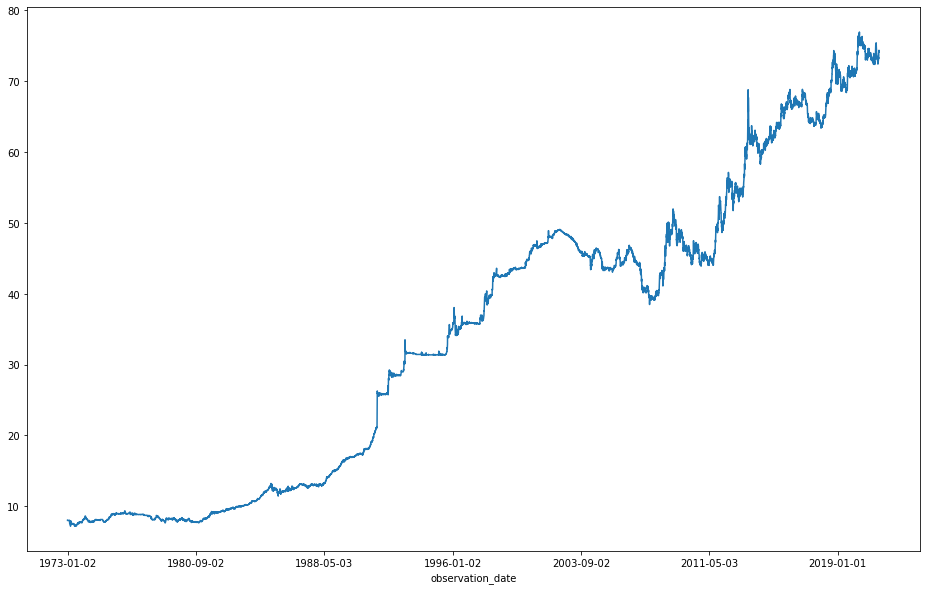

In [17]:
data.DEXINUS.plot(figsize=(16,10))

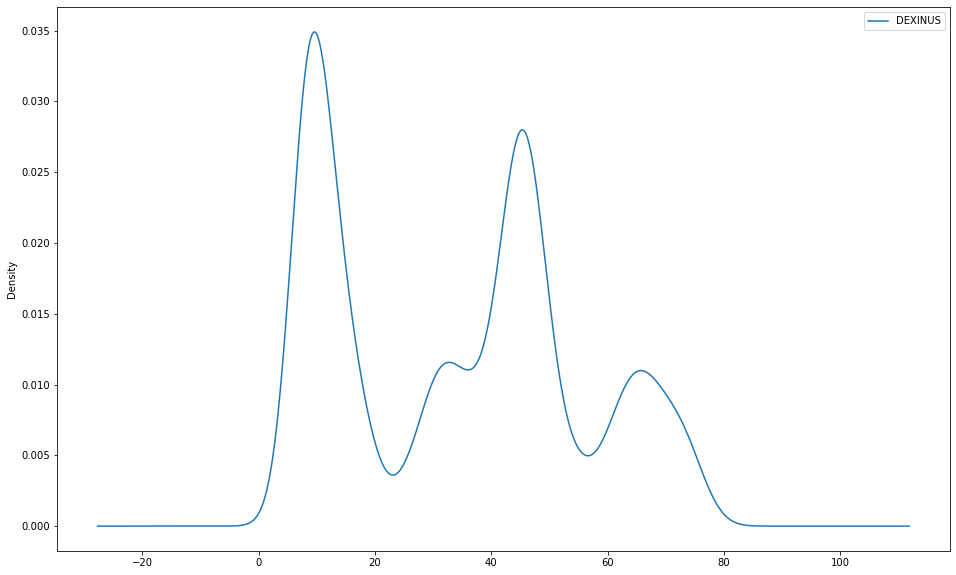

In [18]:
data.plot.kde(figsize=(16,10))

{'bodies': [<matplotlib.collections.PolyCollection at 0x18fff7936a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x18fff793520>,
 'cmins': <matplotlib.collections.LineCollection at 0x18fff793580>,
 'cbars': <matplotlib.collections.LineCollection at 0x18fff793af0>}

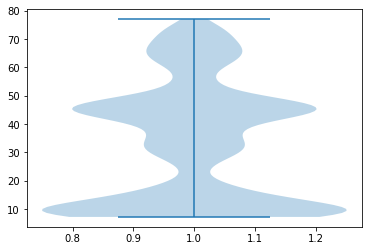

In [19]:
plt.violinplot(data["DEXINUS"])

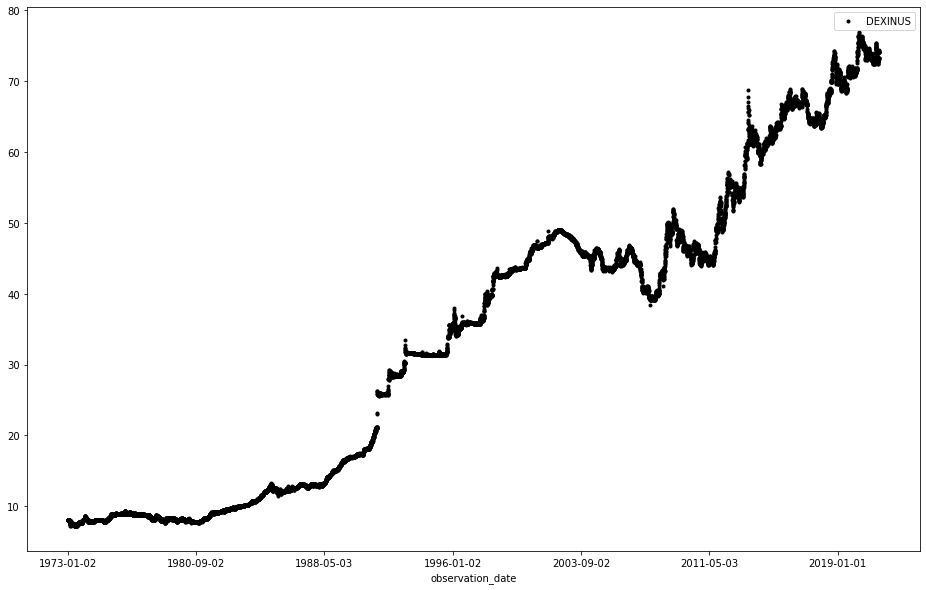

In [20]:
data.plot(style='k.',figsize=(16,10))
plt.show()

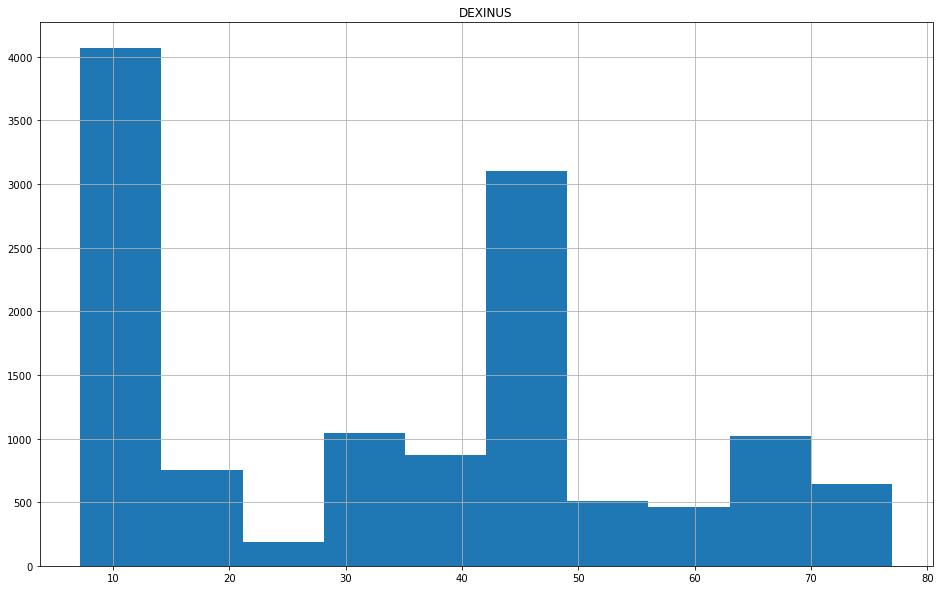

In [21]:
data.hist(figsize=(16,10))
plt.show()

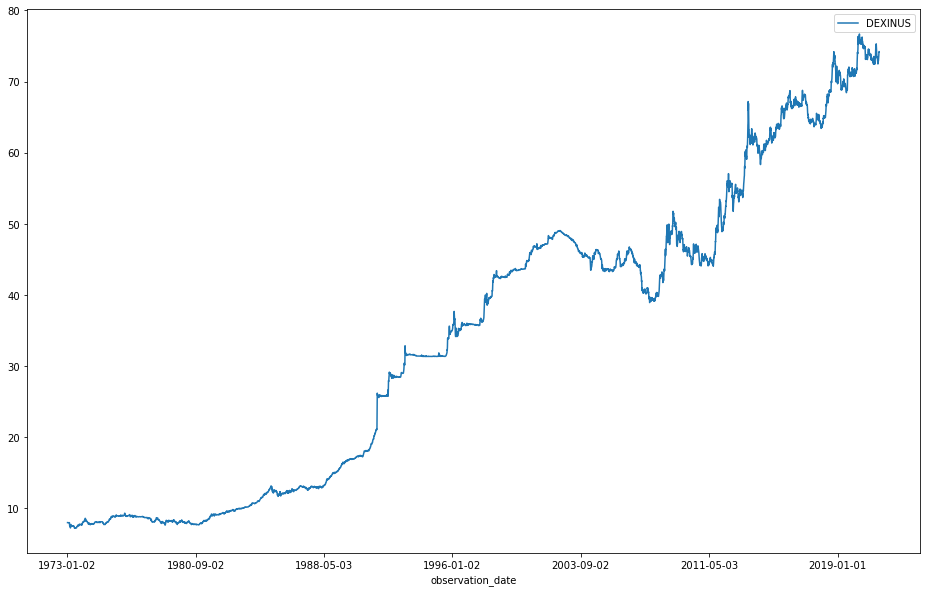

In [22]:
price_dex=data.rolling(3,win_type=None).mean()
price_dex.plot(style=['-','--',':'],figsize=(16,10))

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


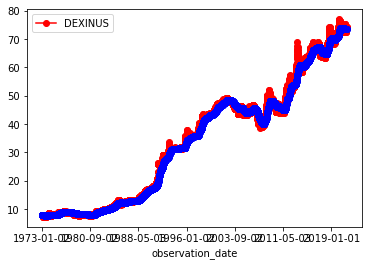

In [24]:
model=SimpleExpSmoothing(data).fit(smoothing_level=0.01,optimized=False)

data.plot(marker='o',color='red')
model.fittedvalues.plot(marker='o',color='blue')

In [25]:
data.dtypes

DEXINUS    float64
dtype: object

In [26]:
data

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00
...,...
2021-06-21,74.18
2021-06-22,74.37
2021-06-23,74.13


In [27]:
data=data.DEXINUS.astype('int')

In [28]:
data.dtypes

dtype('int32')

In [29]:
data

observation_date
1973-01-02     8
1973-01-03     8
1973-01-04     8
1973-01-05     8
1973-01-08     8
              ..
2021-06-21    74
2021-06-22    74
2021-06-23    74
2021-06-24    74
2021-06-25    74
Name: DEXINUS, Length: 12649, dtype: int32

In [30]:
df = data.to_frame()

In [31]:
df

,DEXINUS
observation_date,
1973-01-02,8
1973-01-03,8
1973-01-04,8
1973-01-05,8
1973-01-08,8
...,...
2021-06-21,74
2021-06-22,74
2021-06-23,74


In [32]:
df.dtypes

DEXINUS    int32
dtype: object

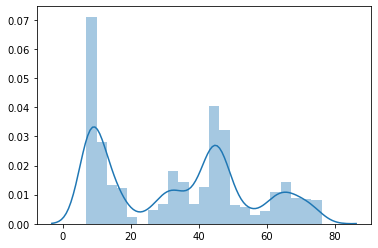

In [33]:
sns.distplot(df)

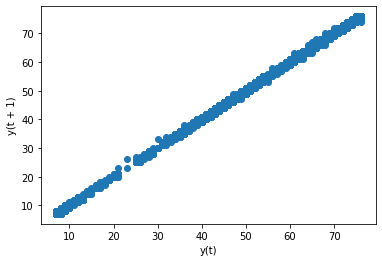

In [34]:
from pandas.plotting import lag_plot
lag_plot(df)

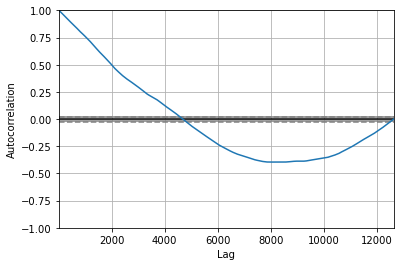

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)

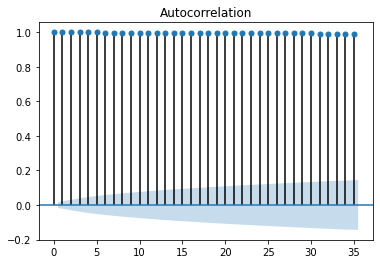

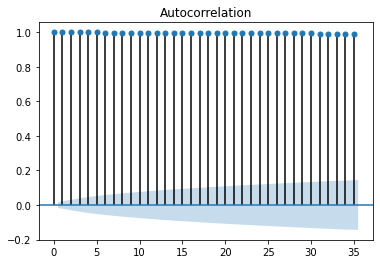

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df,lags=35)

In [37]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [38]:
df

,DEXINUS
observation_date,
1973-01-02,8
1973-01-03,8
1973-01-04,8
1973-01-05,8
1973-01-08,8
...,...
2021-06-21,74
2021-06-22,74
2021-06-23,74


In [39]:
df=df.reset_index()

In [40]:
df

,observation_date,DEXINUS
0,1973-01-02,8
1,1973-01-03,8
2,1973-01-04,8
3,1973-01-05,8
4,1973-01-08,8
...,...,...
12644,2021-06-21,74
12645,2021-06-22,74
12646,2021-06-23,74
12647,2021-06-24,74


In [41]:
df["Date"] = pd.to_datetime(df['observation_date'],format="%Y-%m")

#df['year'] = df['observation_date'].dt.year

In [42]:
df


,observation_date,DEXINUS,Date
0,1973-01-02,8,1973-01-02
1,1973-01-03,8,1973-01-03
2,1973-01-04,8,1973-01-04
3,1973-01-05,8,1973-01-05
4,1973-01-08,8,1973-01-08
...,...,...,...
12644,2021-06-21,74,2021-06-21
12645,2021-06-22,74,2021-06-22
12646,2021-06-23,74,2021-06-23
12647,2021-06-24,74,2021-06-24


In [43]:
df["year"] = df.Date.dt.strftime("%Y")

In [44]:
df

,observation_date,DEXINUS,Date,year
0,1973-01-02,8,1973-01-02,1973
1,1973-01-03,8,1973-01-03,1973
2,1973-01-04,8,1973-01-04,1973
3,1973-01-05,8,1973-01-05,1973
4,1973-01-08,8,1973-01-08,1973
...,...,...,...,...
12644,2021-06-21,74,2021-06-21,2021
12645,2021-06-22,74,2021-06-22,2021
12646,2021-06-23,74,2021-06-23,2021
12647,2021-06-24,74,2021-06-24,2021


In [45]:
df.dtypes

observation_date            object
DEXINUS                      int32
Date                datetime64[ns]
year                        object
dtype: object

In [46]:
df=df.drop(['observation_date'],axis=1)

In [47]:
df

,DEXINUS,Date,year
0,8,1973-01-02,1973
1,8,1973-01-03,1973
2,8,1973-01-04,1973
3,8,1973-01-05,1973
4,8,1973-01-08,1973
...,...,...,...
12644,74,2021-06-21,2021
12645,74,2021-06-22,2021
12646,74,2021-06-23,2021
12647,74,2021-06-24,2021


In [48]:
df.dtypes

DEXINUS             int32
Date       datetime64[ns]
year               object
dtype: object

In [49]:
df['year']=df['year'].astype('int')

In [50]:
df

,DEXINUS,Date,year
0,8,1973-01-02,1973
1,8,1973-01-03,1973
2,8,1973-01-04,1973
3,8,1973-01-05,1973
4,8,1973-01-08,1973
...,...,...,...
12644,74,2021-06-21,2021
12645,74,2021-06-22,2021
12646,74,2021-06-23,2021
12647,74,2021-06-24,2021


In [51]:
df.dtypes

DEXINUS             int32
Date       datetime64[ns]
year                int32
dtype: object

In [52]:
df.set_index('Date')

,DEXINUS,year
Date,,
1973-01-02,8,1973
1973-01-03,8,1973
1973-01-04,8,1973
1973-01-05,8,1973
1973-01-08,8,1973
...,...,...
2021-06-21,74,2021
2021-06-22,74,2021
2021-06-23,74,2021


In [53]:
z=['data_1973','data_1974', 'data_1975','data_1976', 'data_1977', 'data_1978', 'data_1979', 'data_1980', 'data_1981', 'data_1982', 'data_1983',
       'data_1984', 'data_1985', 'data_1986', 'data_1987', 'data_1988', 'data_1989', 'data_1990', 'data_1991', 'data_1992', 'data_1993', 'data_1994',
       'data_1995', 'data_1996', 'data_1997', 'data_1998', 'data_1999', 'data_2000', 'data_2001', 'data_2002', 'data_2003', 'data_2004', 'data_2005',
       'data_2006', 'data_2007', 'data_2008', 'data_2009', 'data_2010', 'data_2011', 'data_2012', 'data_2013', 'data_2014', 'data_2015', 'data_2016',
       'data_2017', 'data_2018', 'data_2019', 'data_2020', 'data_2021']
z

['data_1973',
 'data_1974',
 'data_1975',
 'data_1976',
 'data_1977',
 'data_1978',
 'data_1979',
 'data_1980',
 'data_1981',
 'data_1982',
 'data_1983',
 'data_1984',
 'data_1985',
 'data_1986',
 'data_1987',
 'data_1988',
 'data_1989',
 'data_1990',
 'data_1991',
 'data_1992',
 'data_1993',
 'data_1994',
 'data_1995',
 'data_1996',
 'data_1997',
 'data_1998',
 'data_1999',
 'data_2000',
 'data_2001',
 'data_2002',
 'data_2003',
 'data_2004',
 'data_2005',
 'data_2006',
 'data_2007',
 'data_2008',
 'data_2009',
 'data_2010',
 'data_2011',
 'data_2012',
 'data_2013',
 'data_2014',
 'data_2015',
 'data_2016',
 'data_2017',
 'data_2018',
 'data_2019',
 'data_2020',
 'data_2021']

In [54]:
x=0

for i in range(1973,2022):
    z[x]=df[df['year']==i]
    x=x+1

In [55]:
for x in range(0,49):
    print(z[x])

     DEXINUS       Date  year
0          8 1973-01-02  1973
1          8 1973-01-03  1973
2          8 1973-01-04  1973
3          8 1973-01-05  1973
4          8 1973-01-08  1973
..       ...        ...   ...
255        8 1973-12-25  1973
256        8 1973-12-26  1973
257        8 1973-12-27  1973
258        8 1973-12-28  1973
259        8 1973-12-31  1973

[260 rows x 3 columns]
     DEXINUS       Date  year
260        8 1974-01-01  1974
261        8 1974-01-02  1974
262        8 1974-01-03  1974
263        8 1974-01-04  1974
264        8 1974-01-07  1974
..       ...        ...   ...
516        8 1974-12-25  1974
517        8 1974-12-26  1974
518        8 1974-12-27  1974
519        8 1974-12-30  1974
520        8 1974-12-31  1974

[261 rows x 3 columns]
     DEXINUS       Date  year
521        8 1975-01-01  1975
522        8 1975-01-02  1975
523        8 1975-01-03  1975
524        8 1975-01-06  1975
525        8 1975-01-07  1975
..       ...        ...   ...
777        8 1975-12-2

In [56]:
for x in range(0,49):
    z[x].set_index('Date',inplace=True)
    z[x]=z[x].drop(['year'],axis=1)
    print(z[x])

            DEXINUS
Date               
1973-01-02        8
1973-01-03        8
1973-01-04        8
1973-01-05        8
1973-01-08        8
...             ...
1973-12-25        8
1973-12-26        8
1973-12-27        8
1973-12-28        8
1973-12-31        8

[260 rows x 1 columns]
            DEXINUS
Date               
1974-01-01        8
1974-01-02        8
1974-01-03        8
1974-01-04        8
1974-01-07        8
...             ...
1974-12-25        8
1974-12-26        8
1974-12-27        8
1974-12-30        8
1974-12-31        8

[261 rows x 1 columns]
            DEXINUS
Date               
1975-01-01        8
1975-01-02        8
1975-01-03        8
1975-01-06        8
1975-01-07        8
...             ...
1975-12-25        8
1975-12-26        8
1975-12-29        8
1975-12-30        8
1975-12-31        8

[261 rows x 1 columns]
            DEXINUS
Date               
1976-01-01        8
1976-01-02        8
1976-01-05        8
1976-01-06        8
1976-01-07        8
...     

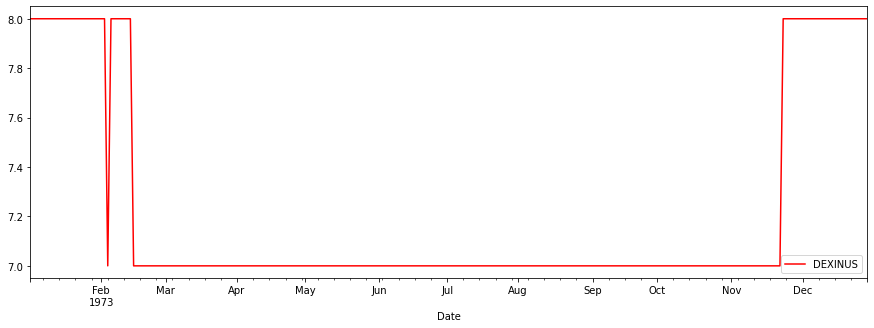

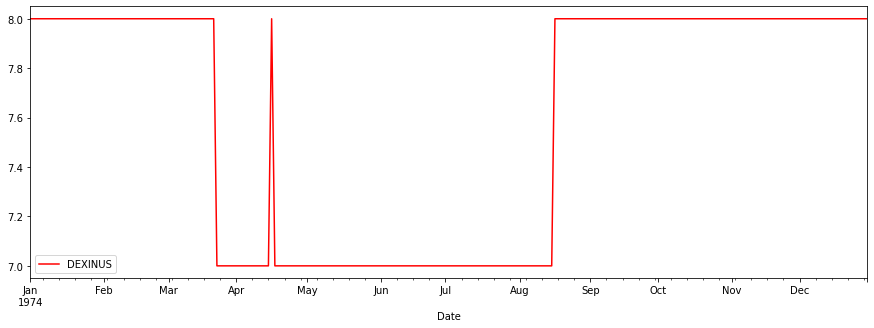

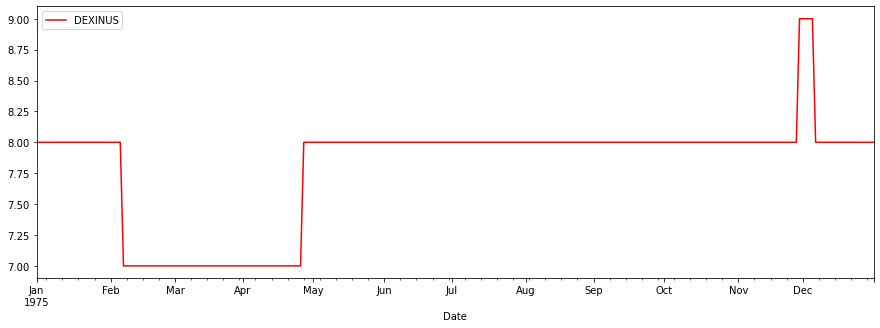

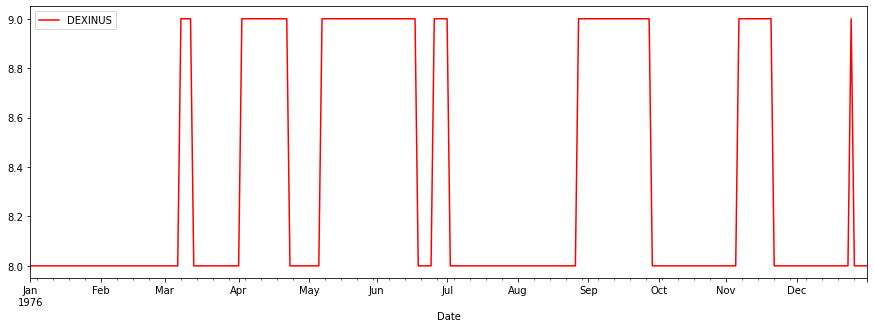

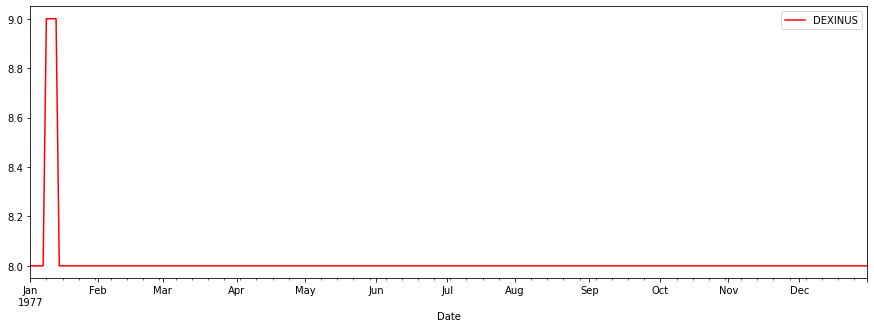

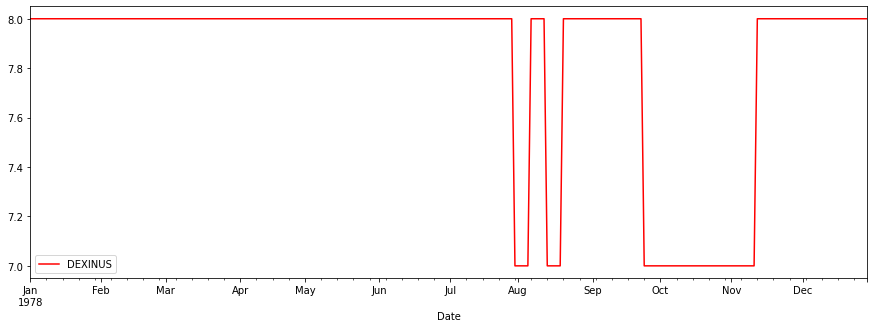

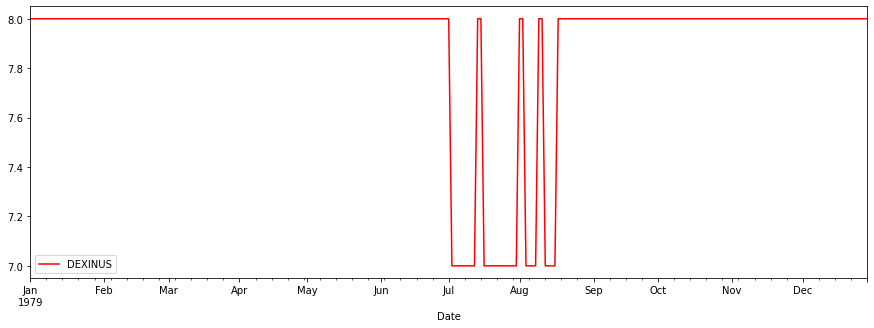

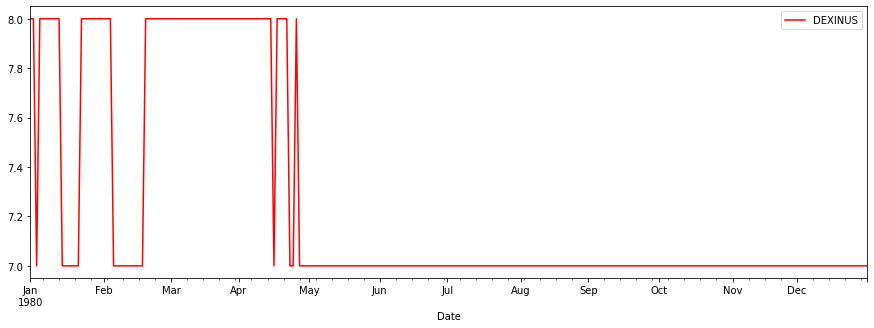

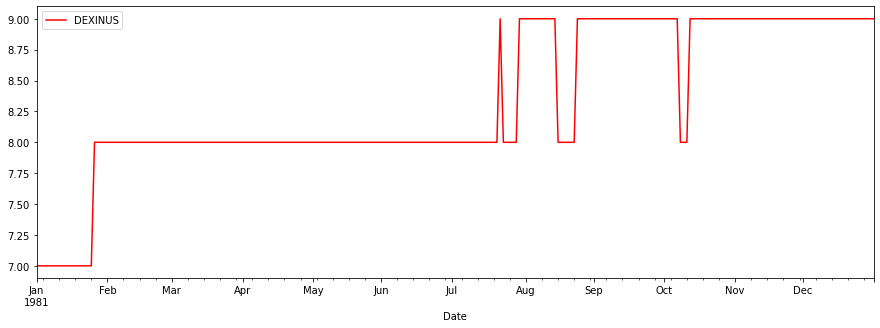

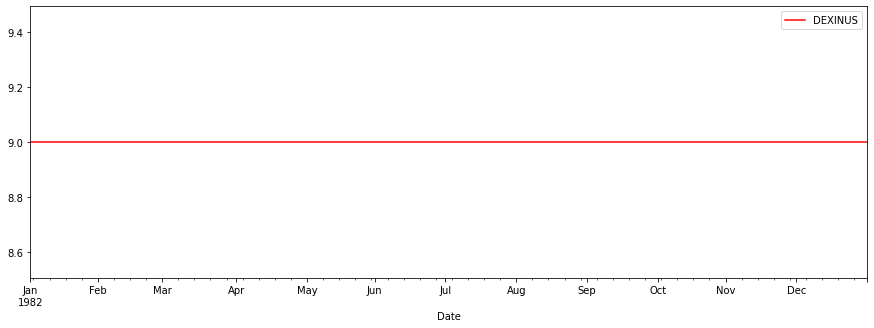

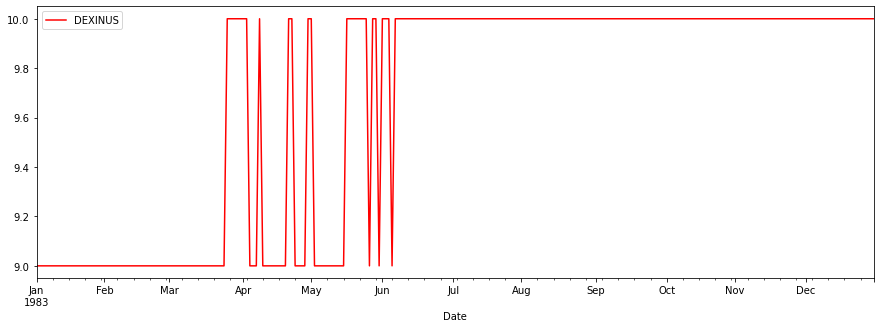

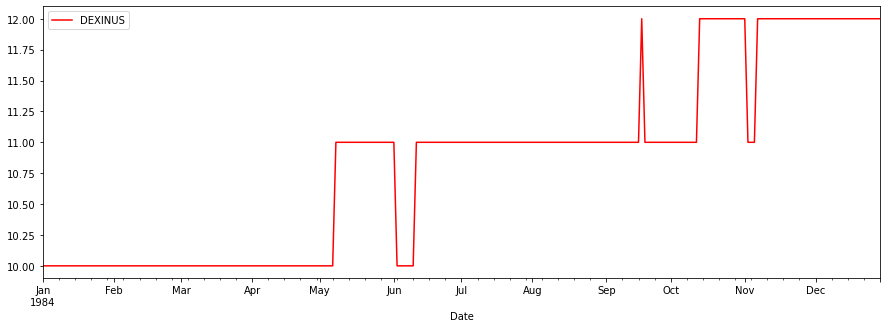

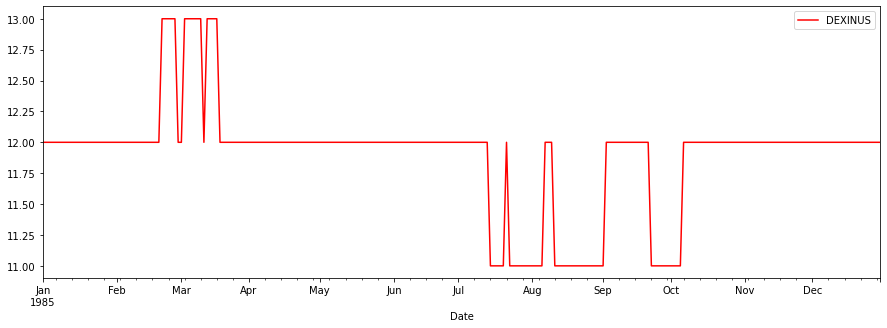

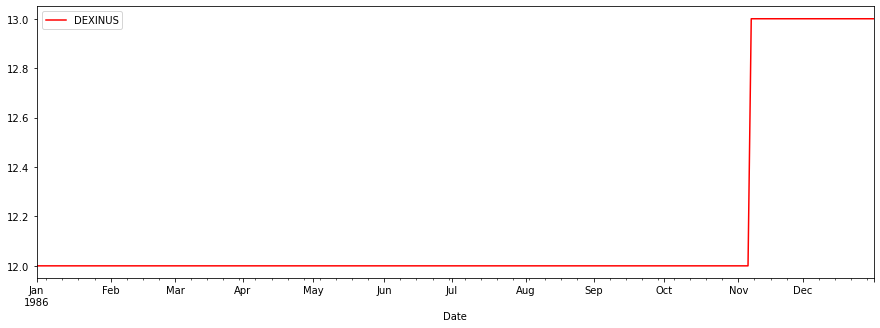

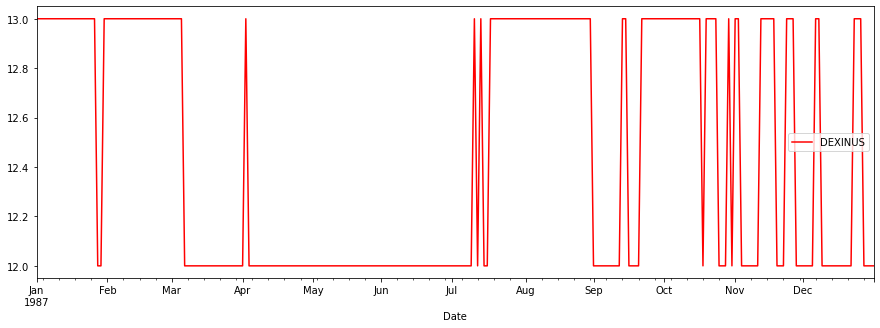

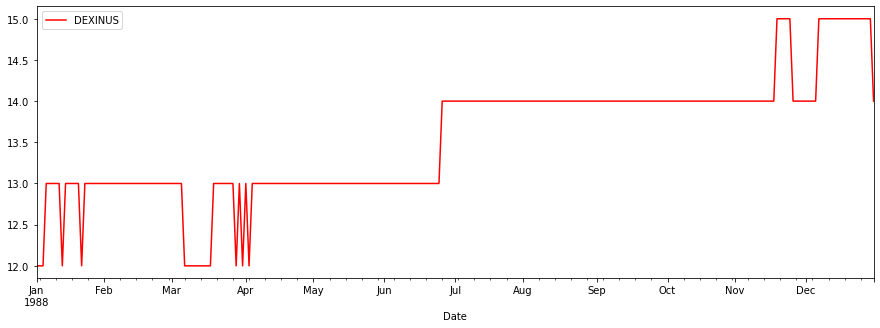

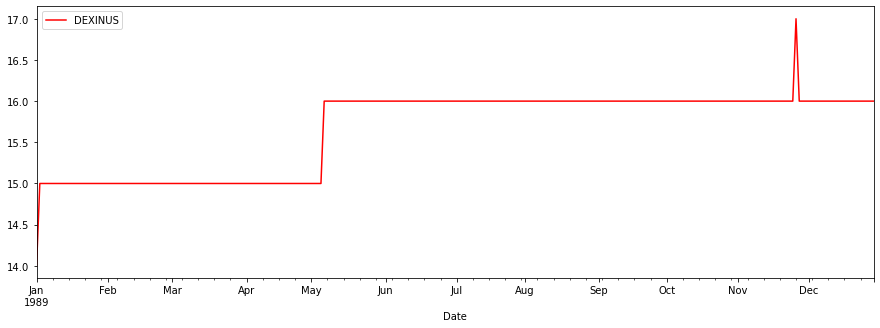

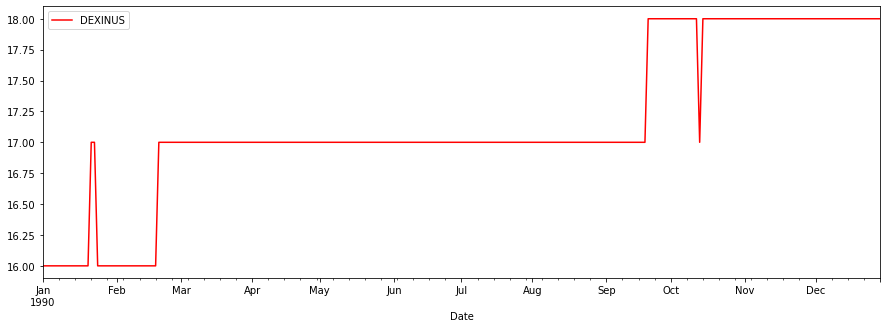

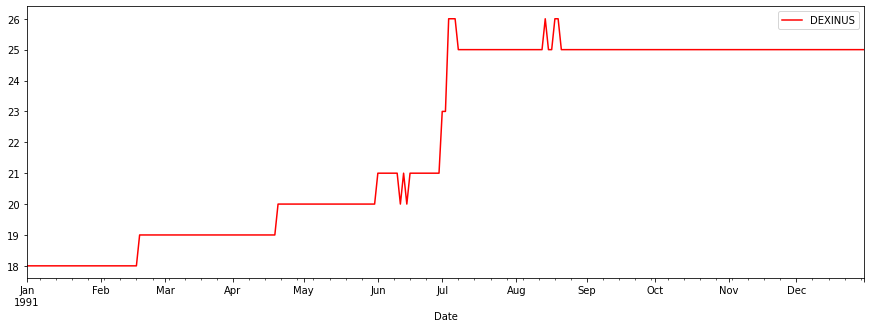

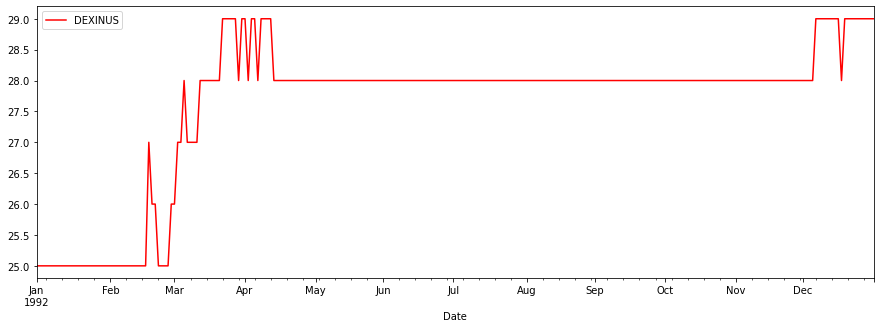

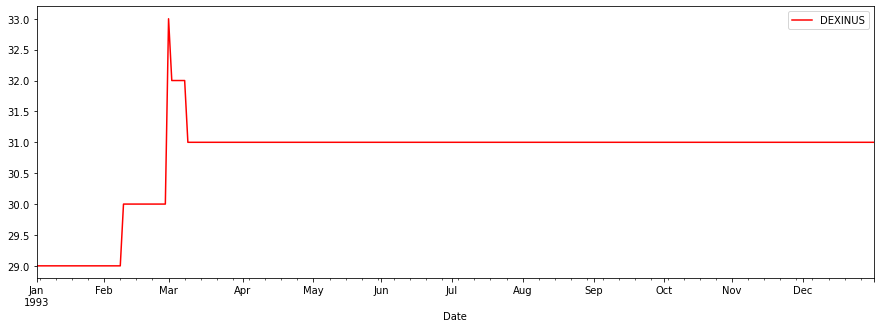

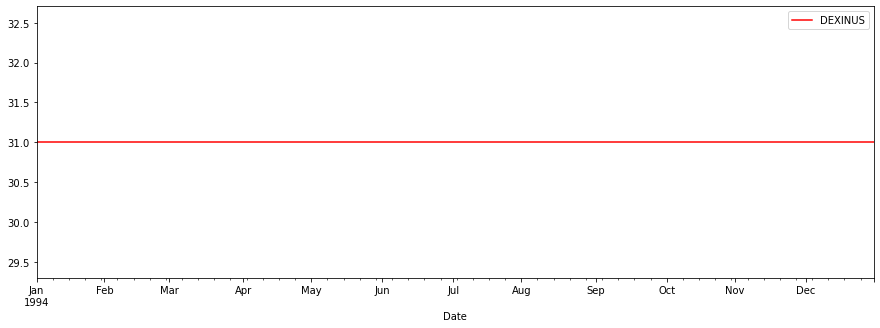

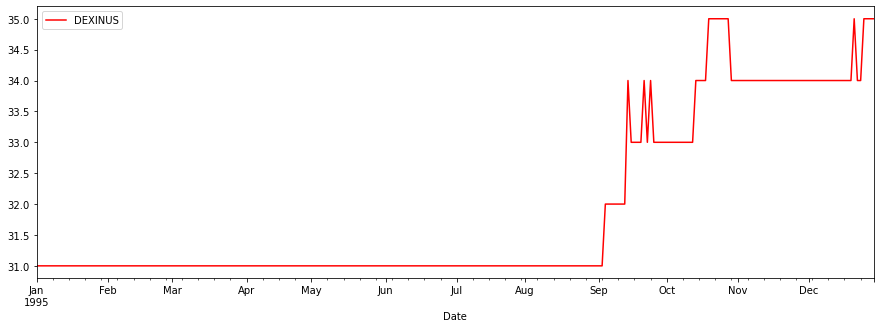

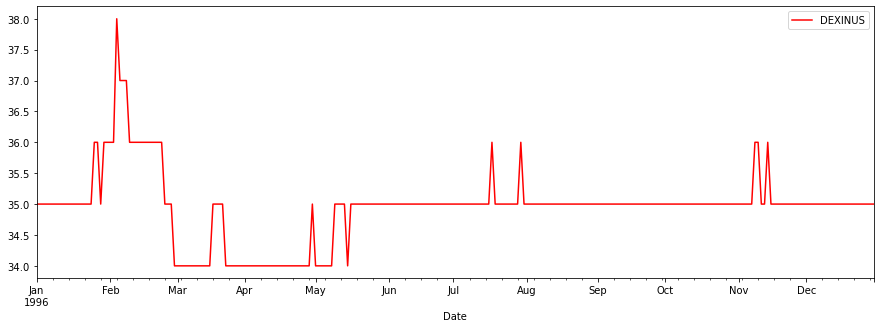

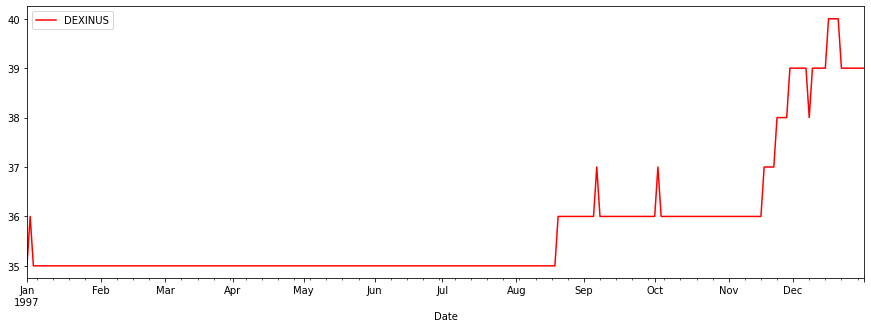

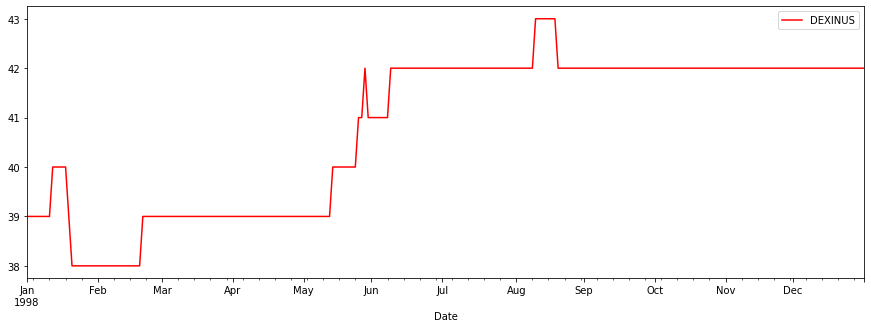

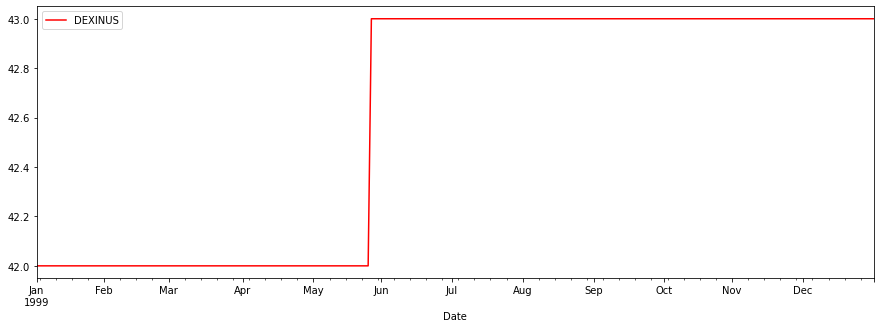

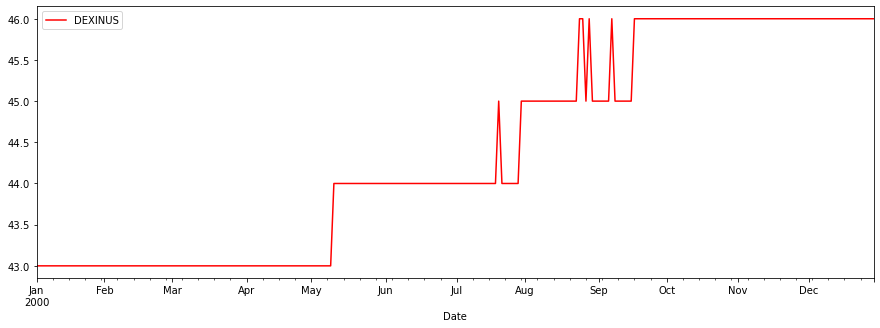

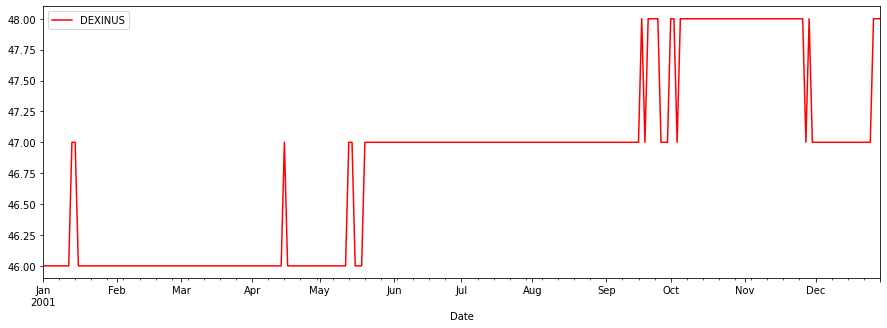

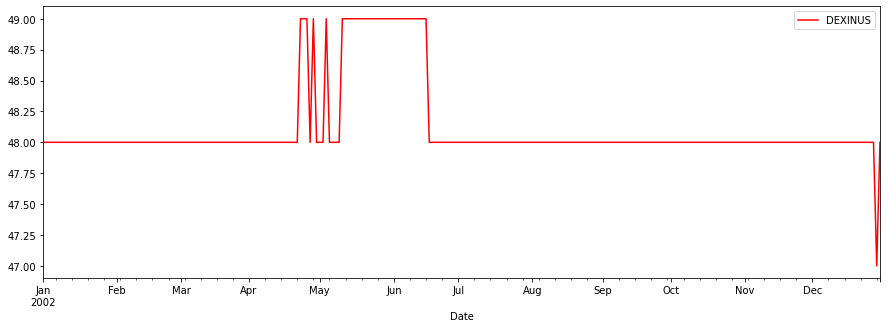

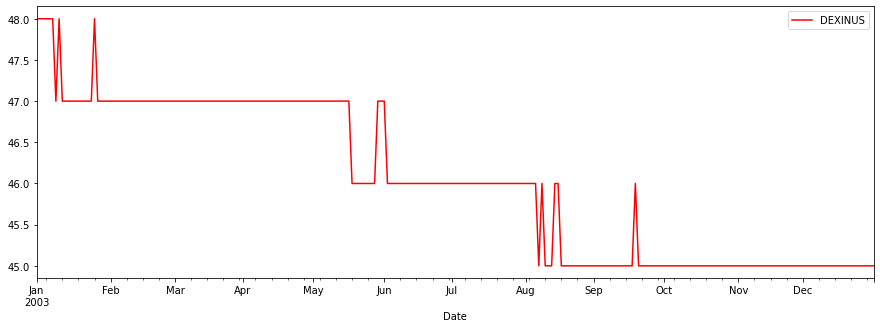

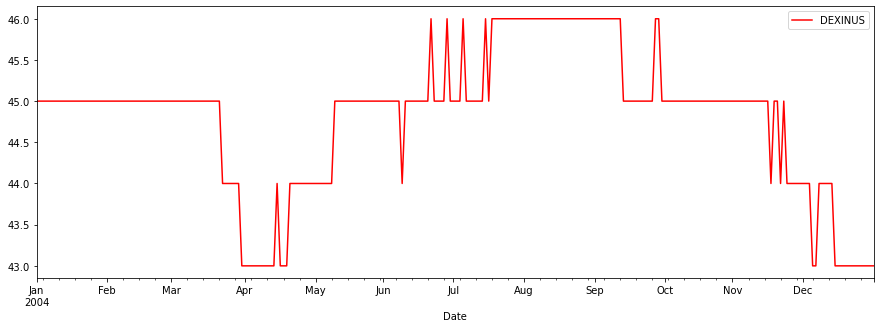

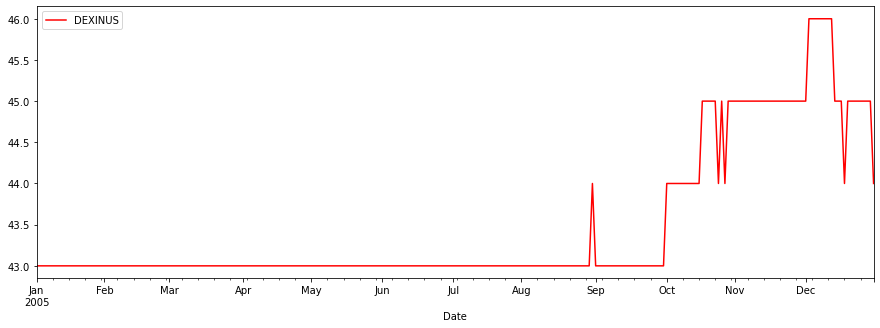

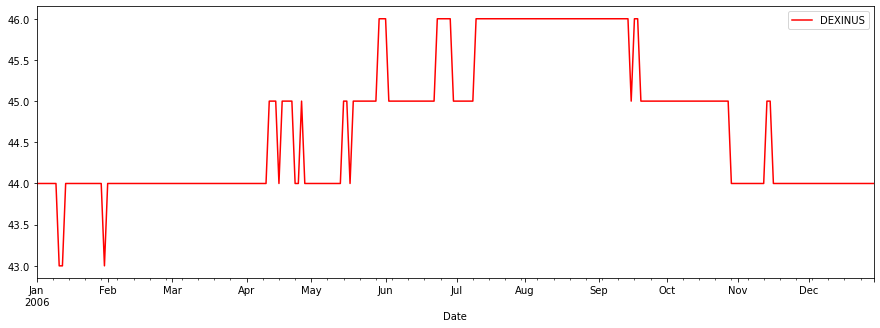

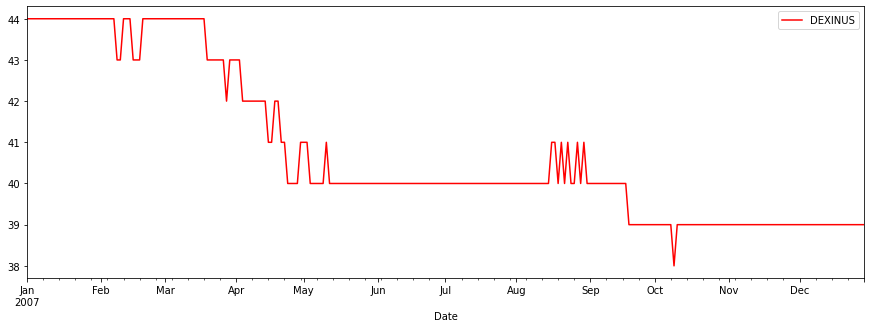

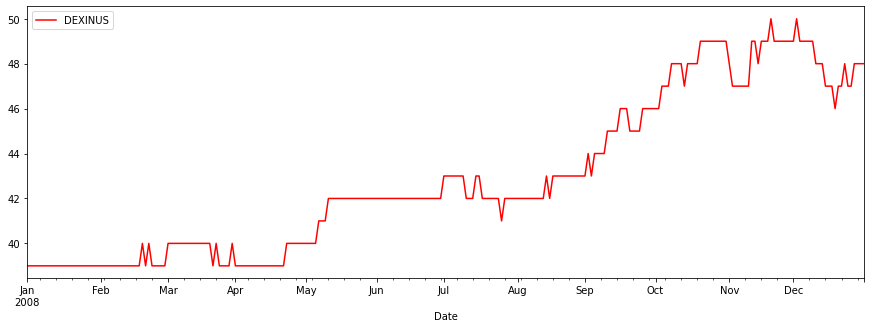

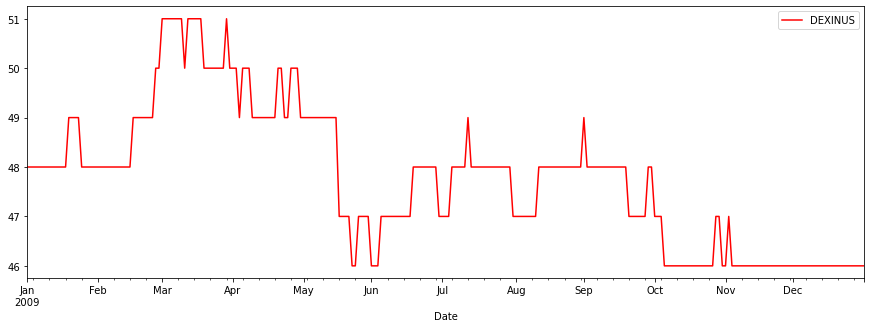

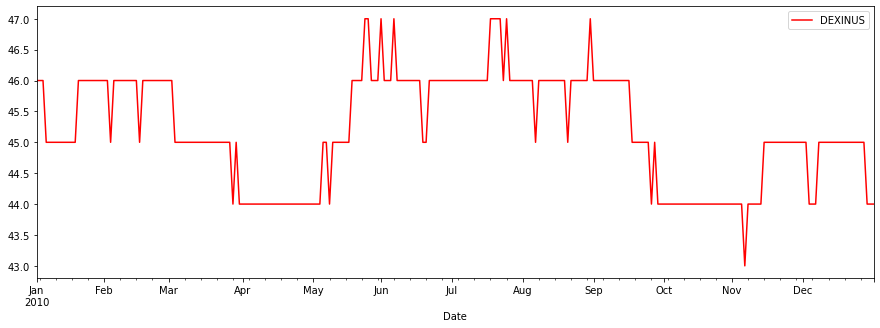

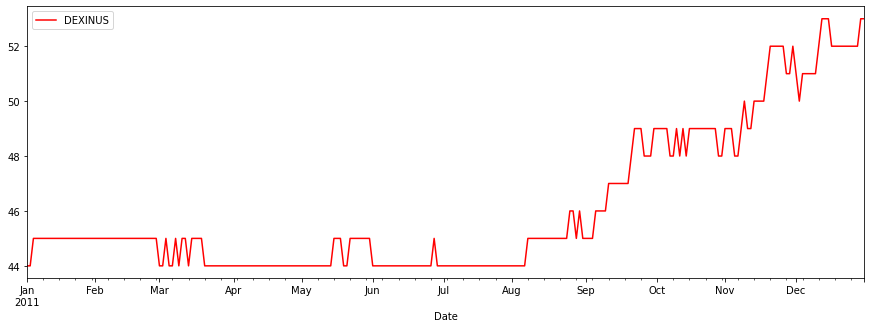

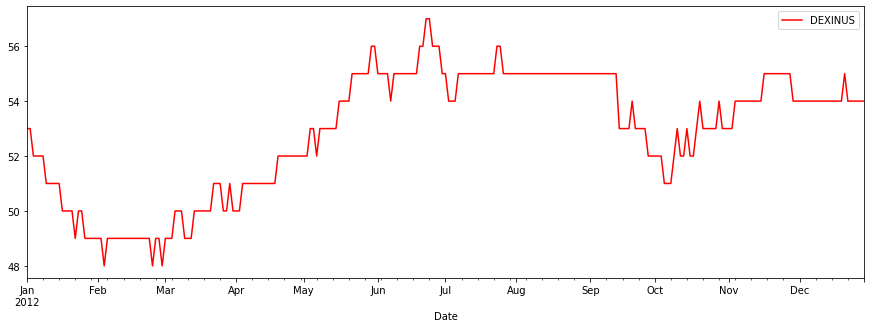

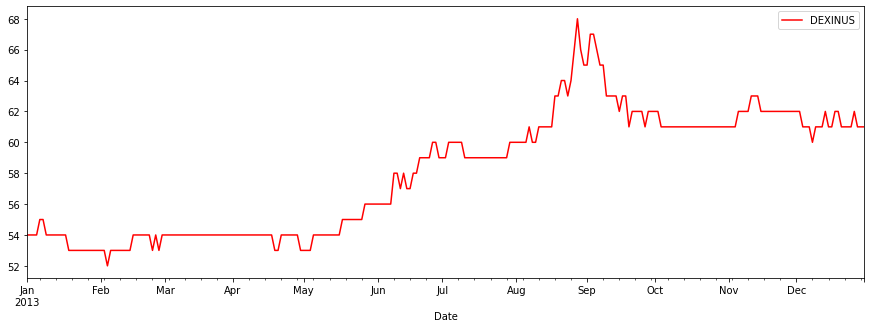

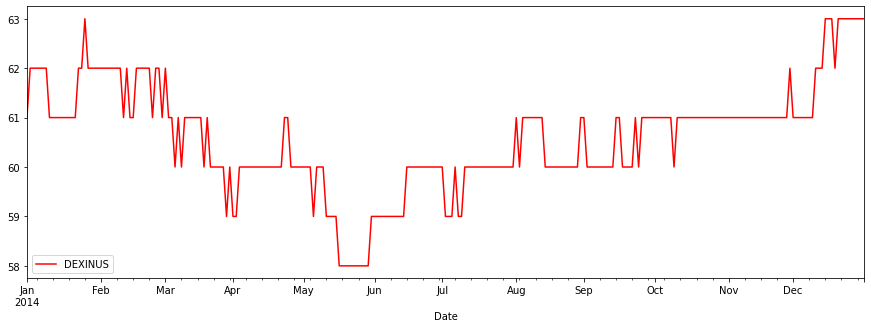

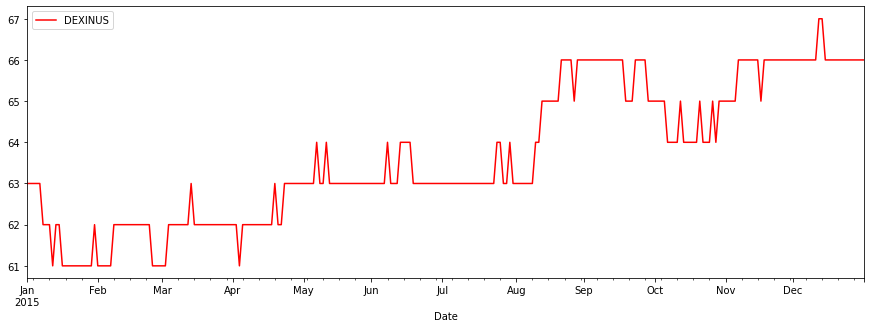

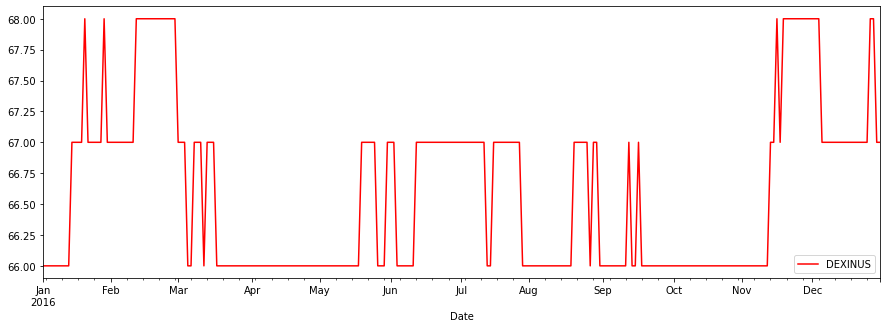

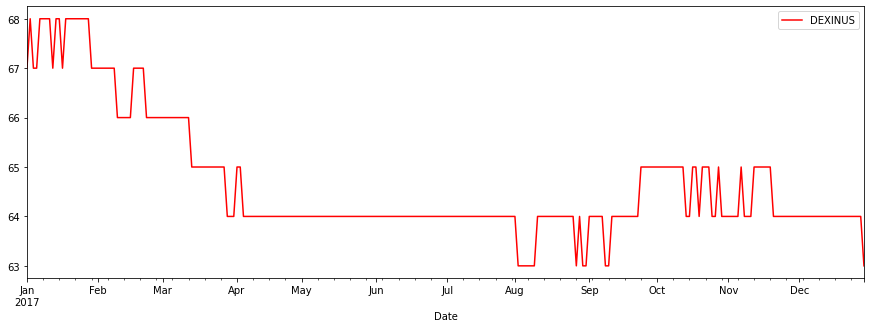

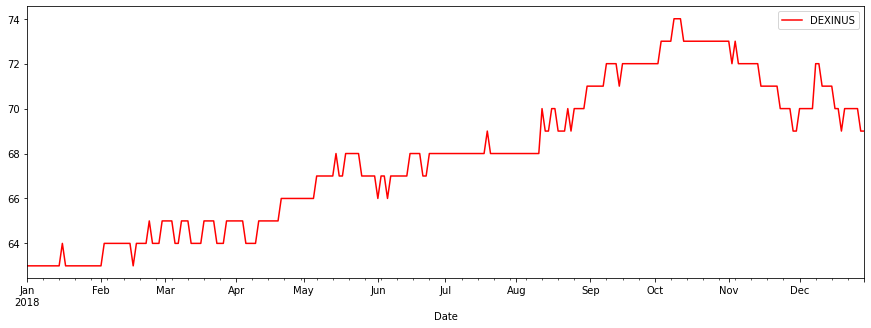

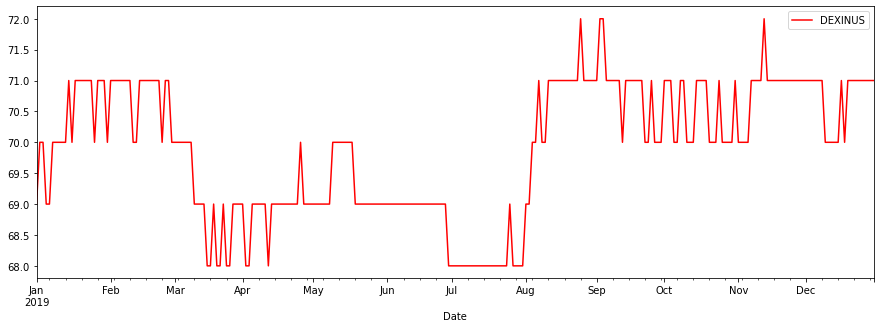

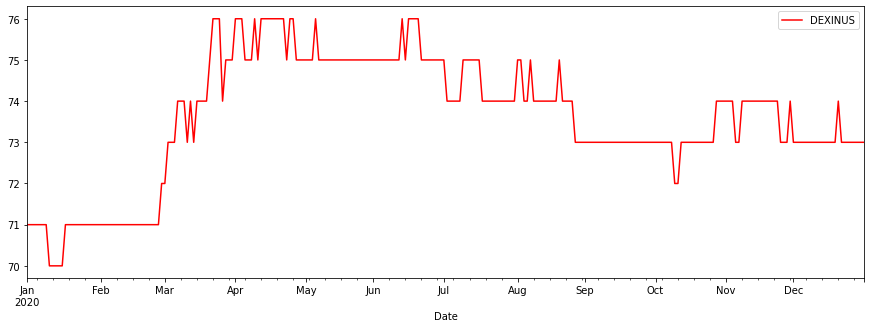

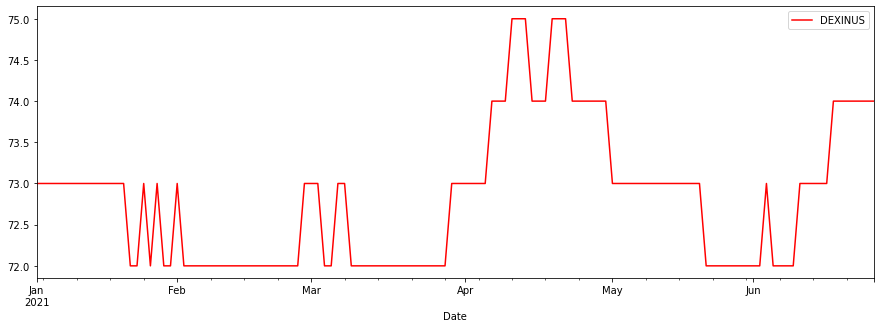

In [57]:
for x in range(0,49):
    z[x].plot(color='red',figsize=(15,5))
    plt.show()

In [58]:
df

,DEXINUS,Date,year
0,8,1973-01-02,1973
1,8,1973-01-03,1973
2,8,1973-01-04,1973
3,8,1973-01-05,1973
4,8,1973-01-08,1973
...,...,...,...
12644,74,2021-06-21,2021
12645,74,2021-06-22,2021
12646,74,2021-06-23,2021
12647,74,2021-06-24,2021


In [64]:
df_new=df.copy()
df_new

,DEXINUS,Date,year
0,8,1973-01-02,1973
1,8,1973-01-03,1973
2,8,1973-01-04,1973
3,8,1973-01-05,1973
4,8,1973-01-08,1973
...,...,...,...
12644,74,2021-06-21,2021
12645,74,2021-06-22,2021
12646,74,2021-06-23,2021
12647,74,2021-06-24,2021


In [65]:
df_new=df_new.drop(['year'],axis=1)
df_new

,DEXINUS,Date
0,8,1973-01-02
1,8,1973-01-03
2,8,1973-01-04
3,8,1973-01-05
4,8,1973-01-08
...,...,...
12644,74,2021-06-21
12645,74,2021-06-22
12646,74,2021-06-23
12647,74,2021-06-24


In [67]:
df_new.set_index('Date',inplace=True)

In [68]:
df_new

,DEXINUS
Date,
1973-01-02,8
1973-01-03,8
1973-01-04,8
1973-01-05,8
1973-01-08,8
...,...
2021-06-21,74
2021-06-22,74
2021-06-23,74


In [86]:
upsampled = df_new.resample('Q')
data_q = upsampled.interpolate(method='linear')
data_q

,DEXINUS
Date,
1973-03-31,NaN
1973-06-30,NaN
1973-09-30,NaN
1973-12-31,8.0
1974-03-31,8.0
...,...
2020-06-30,75.0
2020-09-30,73.0
2020-12-31,73.0


In [87]:
data_q.isnull().sum()

DEXINUS    3
dtype: int64

In [88]:
data_q.fillna(method='bfill',inplace=True)

data_q

,DEXINUS
Date,
1973-03-31,8.0
1973-06-30,8.0
1973-09-30,8.0
1973-12-31,8.0
1974-03-31,8.0
...,...
2020-06-30,75.0
2020-09-30,73.0
2020-12-31,73.0


In [89]:
data_q.isnull().any()

DEXINUS    False
dtype: bool

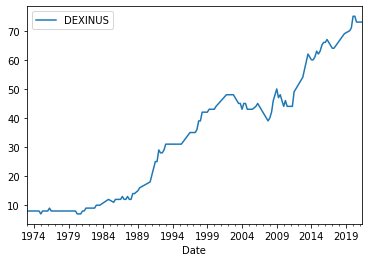

In [90]:
data_q.plot()

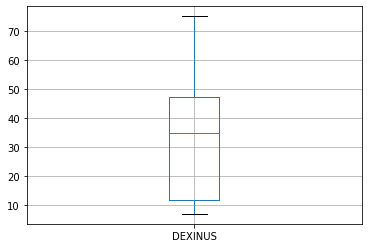

In [91]:
data_q.boxplot()

In [95]:
data_q=data_q.reset_index()
data_q

,Date,DEXINUS
0,1973-03-31,8.0
1,1973-06-30,8.0
2,1973-09-30,8.0
3,1973-12-31,8.0
4,1974-03-31,8.0
...,...,...
189,2020-06-30,75.0
190,2020-09-30,73.0
191,2020-12-31,73.0
192,2021-03-31,73.0


In [96]:
data_q["year"] = data_q.Date.dt.strftime("%Y")

In [97]:
data_q

,Date,DEXINUS,year
0,1973-03-31,8.0,1973
1,1973-06-30,8.0,1973
2,1973-09-30,8.0,1973
3,1973-12-31,8.0,1973
4,1974-03-31,8.0,1974
...,...,...,...
189,2020-06-30,75.0,2020
190,2020-09-30,73.0,2020
191,2020-12-31,73.0,2020
192,2021-03-31,73.0,2021


In [107]:
data_q=data_q.set_index('Date')
data_q

,DEXINUS,year
Date,,
1973-03-31,8.0,1973
1973-06-30,8.0,1973
1973-09-30,8.0,1973
1973-12-31,8.0,1973
1974-03-31,8.0,1974
...,...,...
2020-06-30,75.0,2020
2020-09-30,73.0,2020
2020-12-31,73.0,2020


In [111]:
data_q.dtypes

DEXINUS    float64
year        object
dtype: object

In [115]:
data_q['year']=data_q['year'].astype('int')

In [116]:
data_q

,DEXINUS,year
Date,,
1973-03-31,8.0,1973
1973-06-30,8.0,1973
1973-09-30,8.0,1973
1973-12-31,8.0,1973
1974-03-31,8.0,1974
...,...,...
2020-06-30,75.0,2020
2020-09-30,73.0,2020
2020-12-31,73.0,2020


In [117]:
data_q.dtypes

DEXINUS    float64
year         int32
dtype: object

In [121]:
data_q['DEXINUS']=data_q['DEXINUS'].astype('int')

In [122]:
data_q.dtypes

DEXINUS    int32
year       int32
dtype: object

In [125]:
r=0

for i in range(1973,2022):
    z[r]=data_q[data_q['year']==i]
    r=r+1

In [126]:
print(z[11])

            DEXINUS  year
Date                     
1984-03-31       10  1984
1984-06-30       11  1984
1984-09-30       11  1984
1984-12-31       12  1984


In [127]:
for x in range(0,49):
    #z_q[x].set_index('Date',inplace=True)
    z[x]=z[x].drop(['year'],axis=1)
    print(z[x])

            DEXINUS
Date               
1973-03-31        8
1973-06-30        8
1973-09-30        8
1973-12-31        8
            DEXINUS
Date               
1974-03-31        8
1974-06-30        8
1974-09-30        8
1974-12-31        8
            DEXINUS
Date               
1975-03-31        7
1975-06-30        8
1975-09-30        8
1975-12-31        8
            DEXINUS
Date               
1976-03-31        8
1976-06-30        9
1976-09-30        8
1976-12-31        8
            DEXINUS
Date               
1977-03-31        8
1977-06-30        8
1977-09-30        8
1977-12-31        8
            DEXINUS
Date               
1978-03-31        8
1978-06-30        8
1978-09-30        8
1978-12-31        8
            DEXINUS
Date               
1979-03-31        8
1979-06-30        8
1979-09-30        8
1979-12-31        8
            DEXINUS
Date               
1980-03-31        8
1980-06-30        7
1980-09-30        7
1980-12-31        7
            DEXINUS
Date               


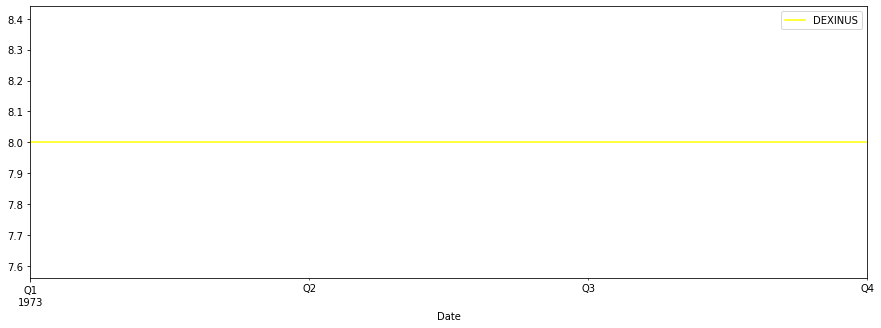

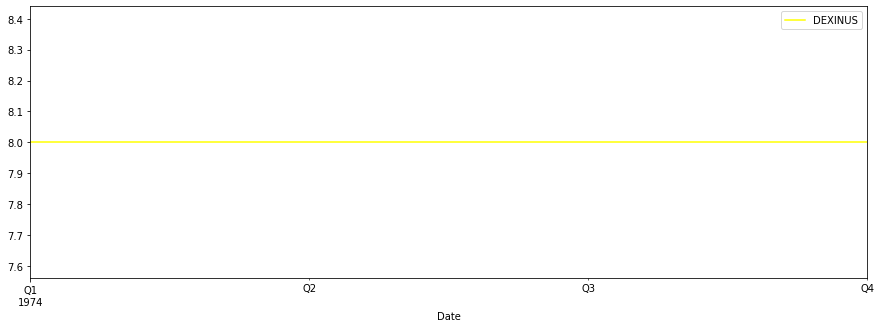

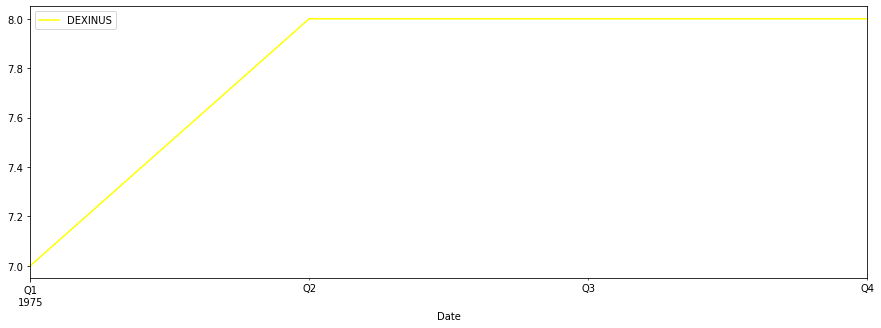

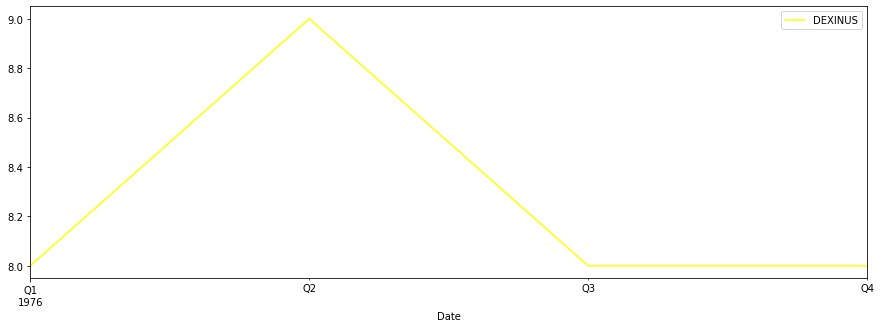

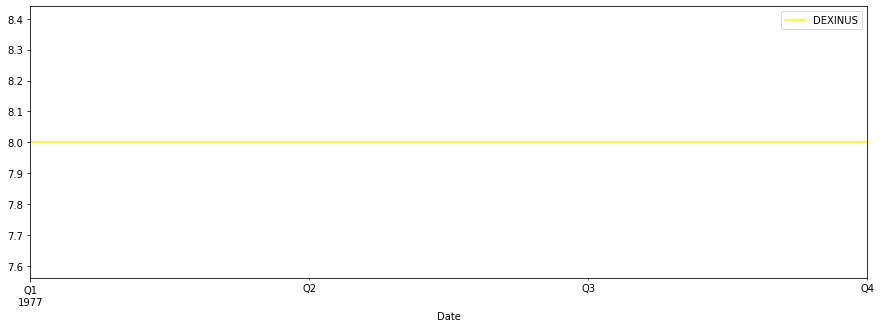

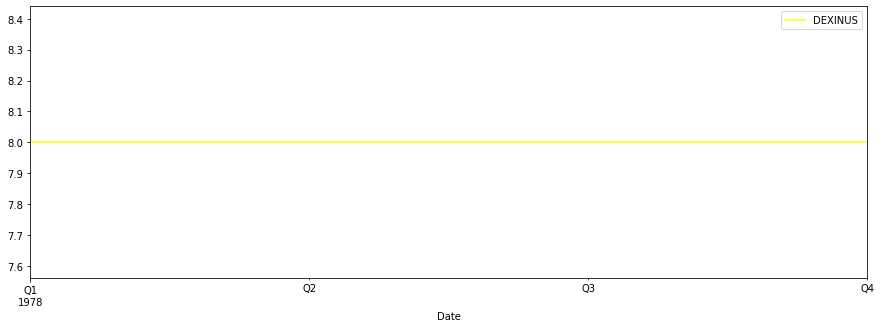

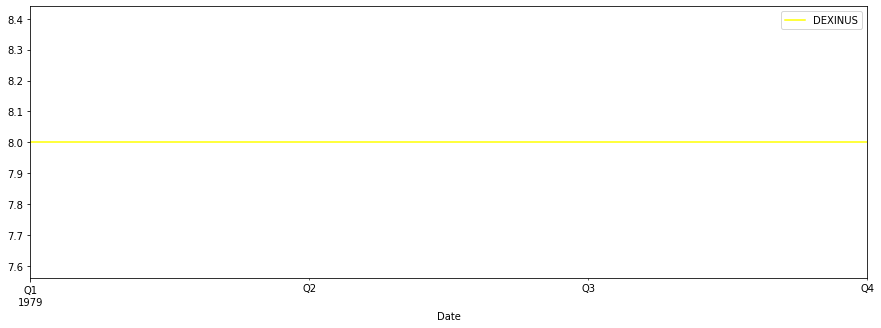

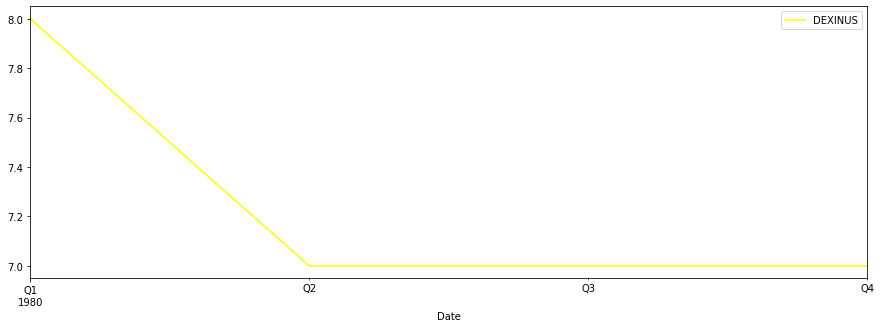

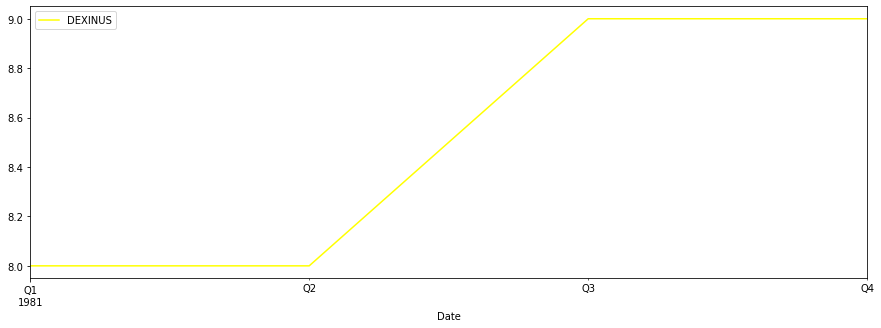

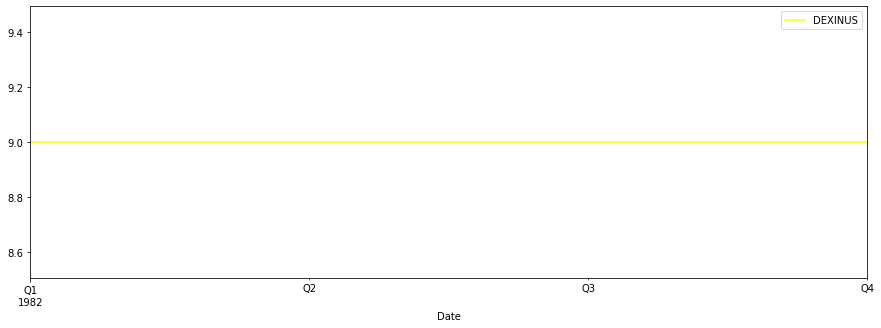

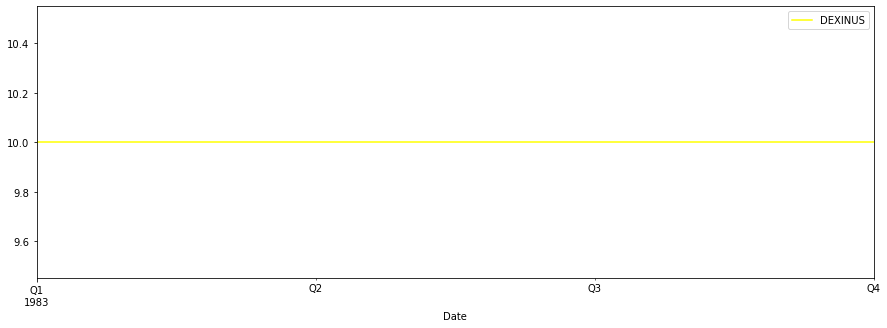

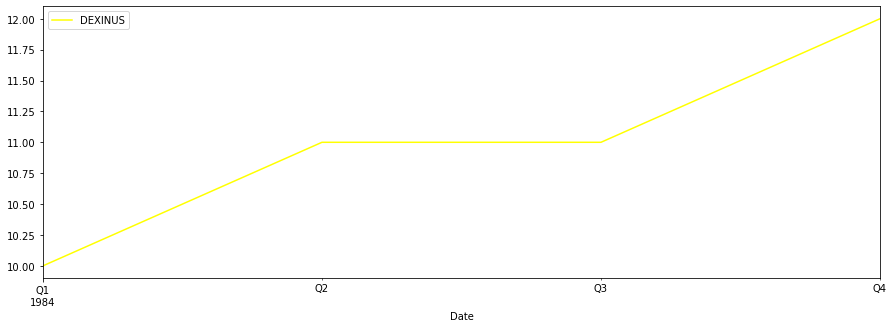

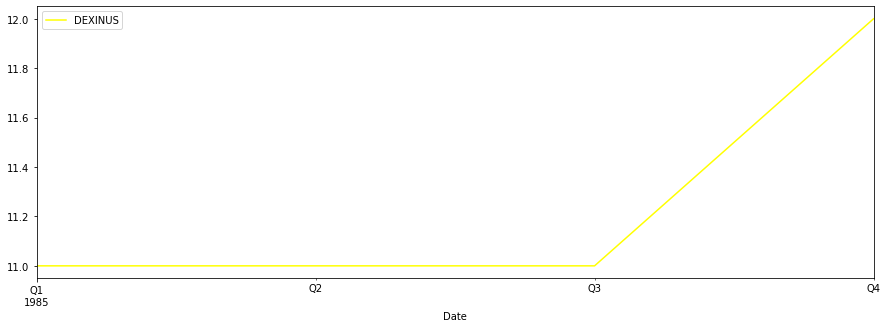

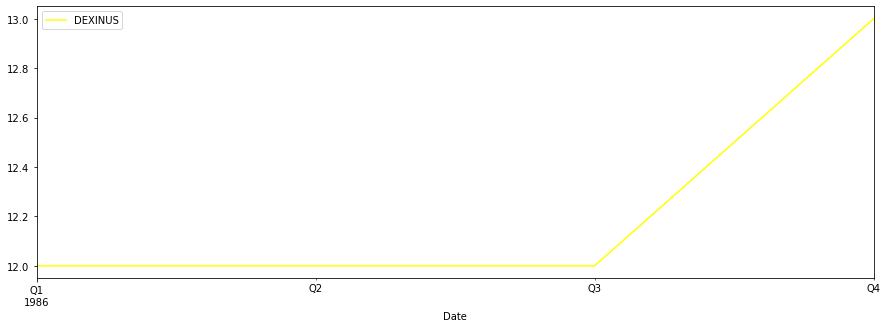

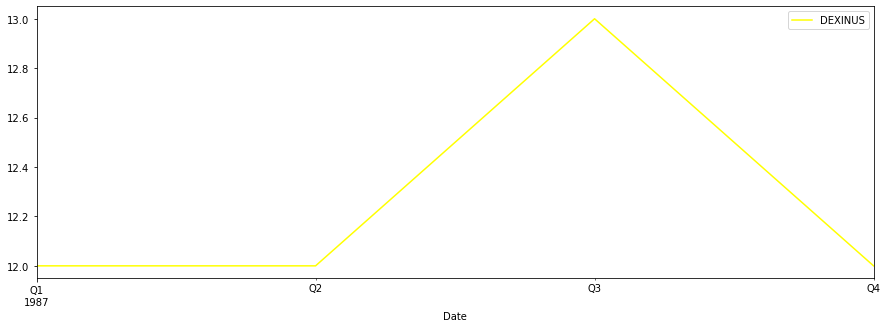

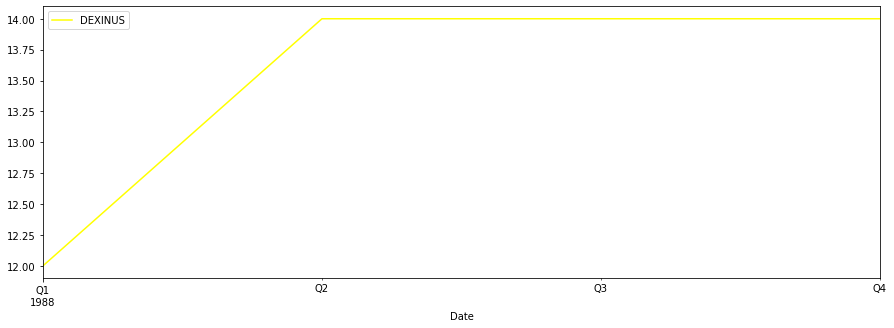

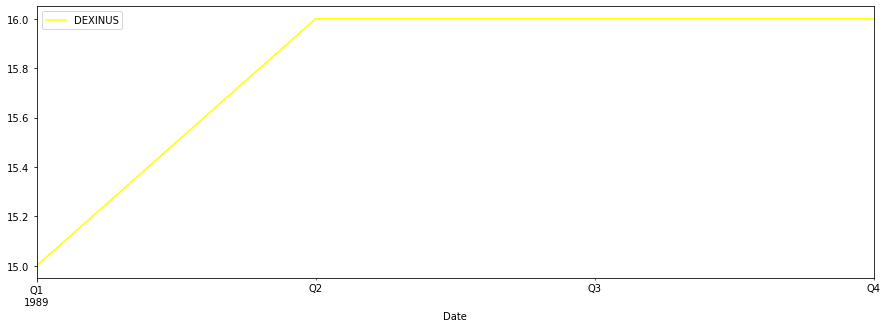

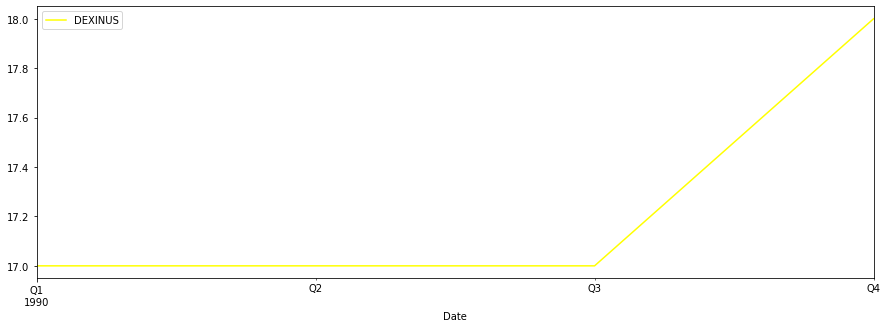

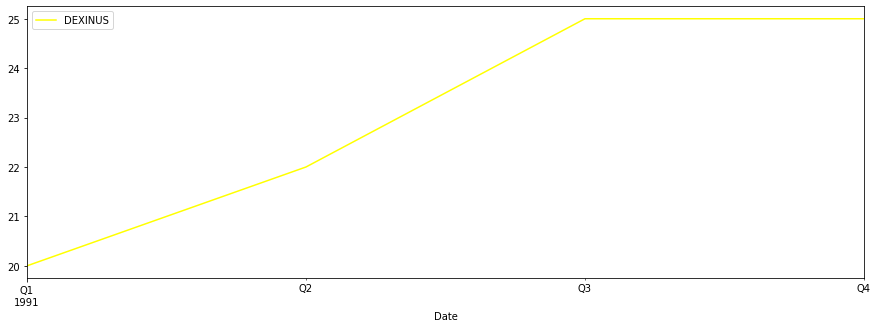

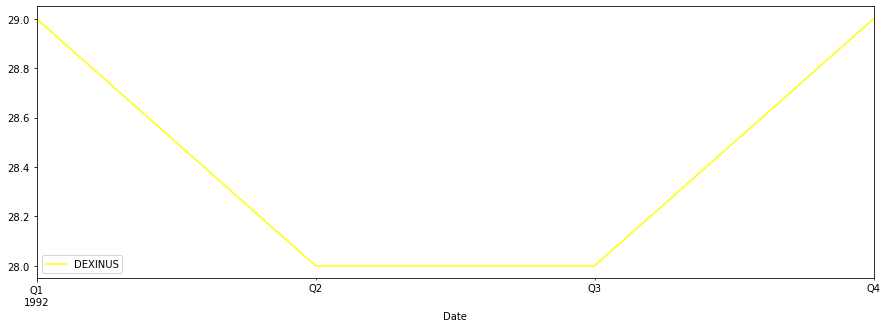

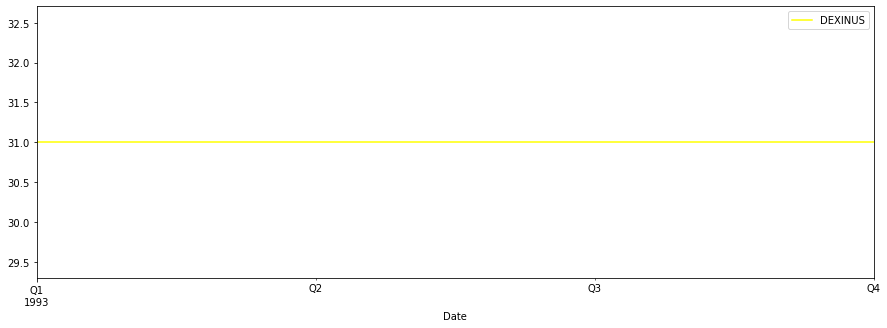

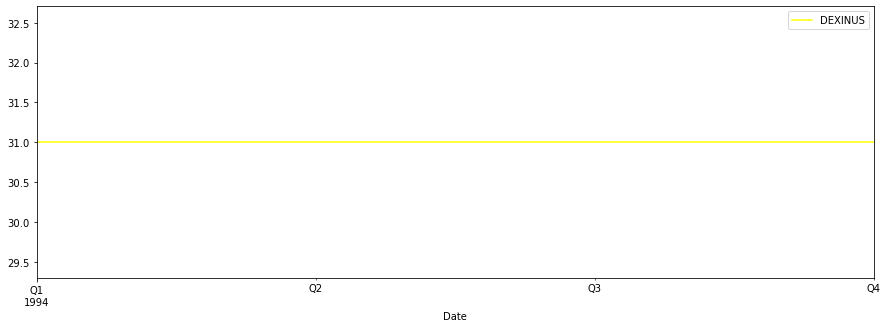

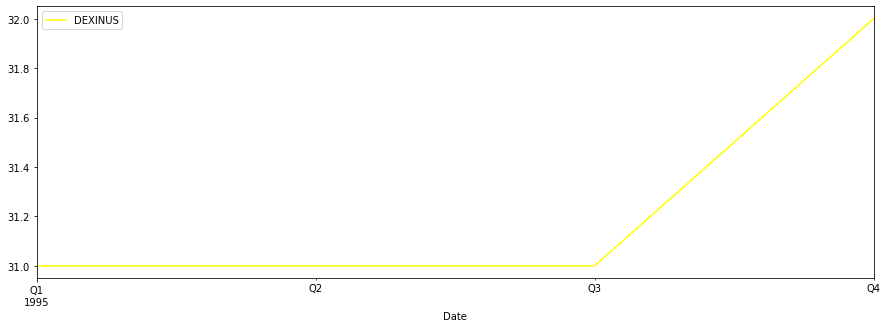

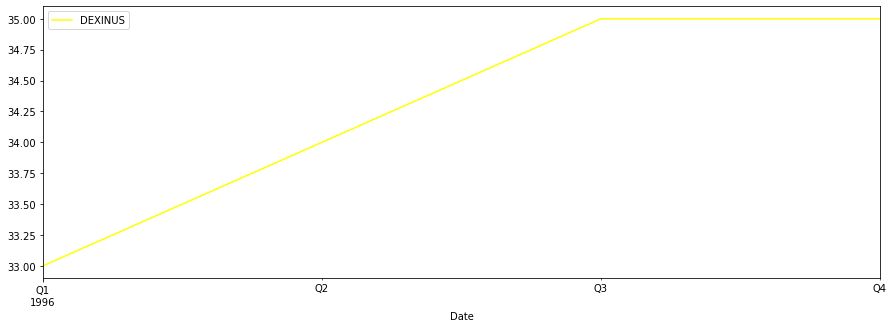

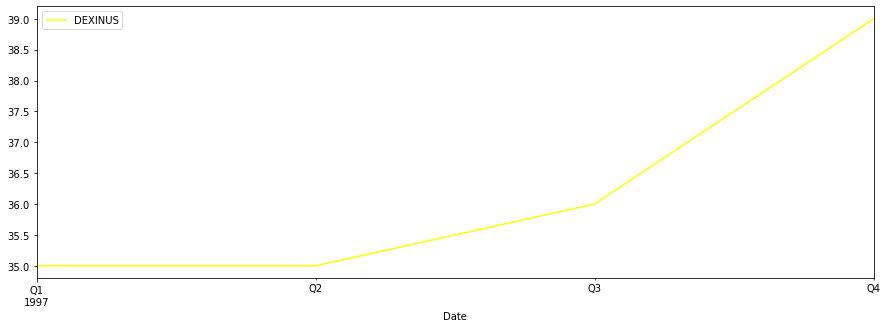

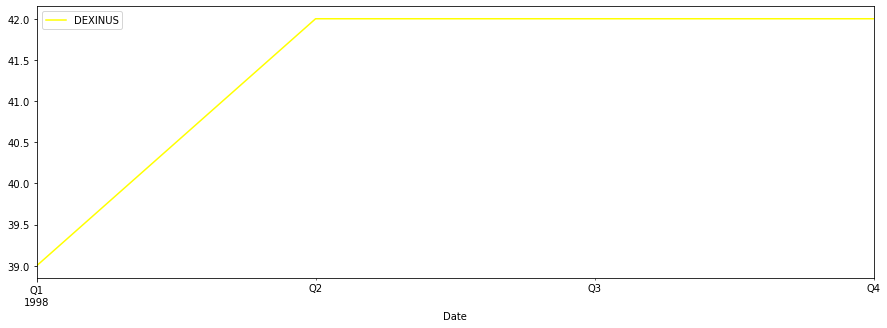

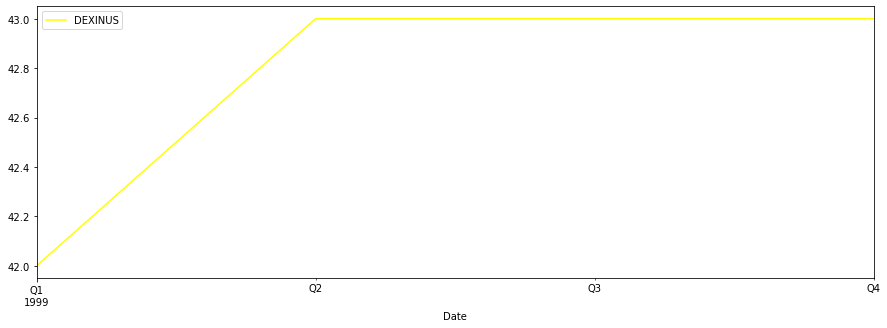

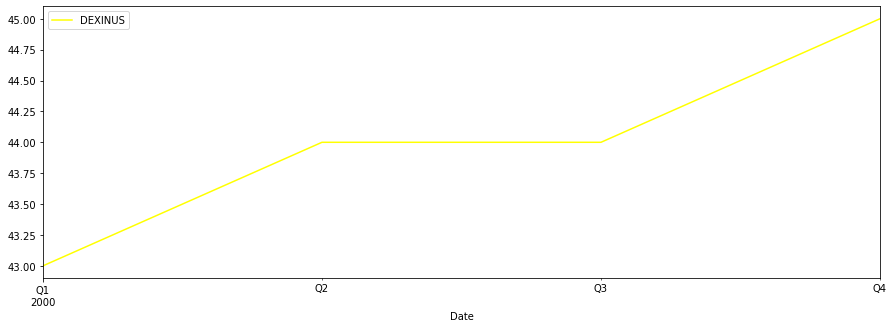

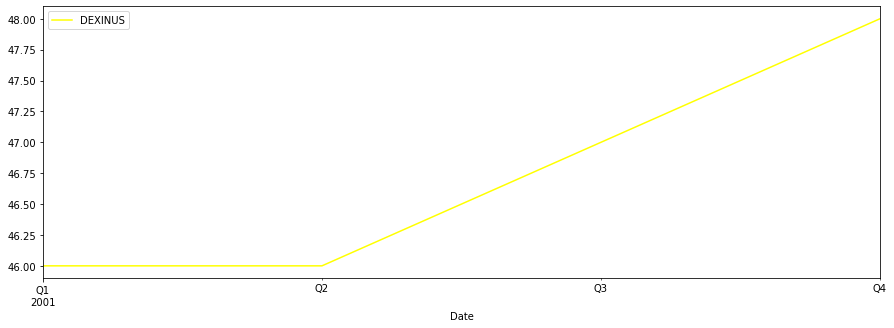

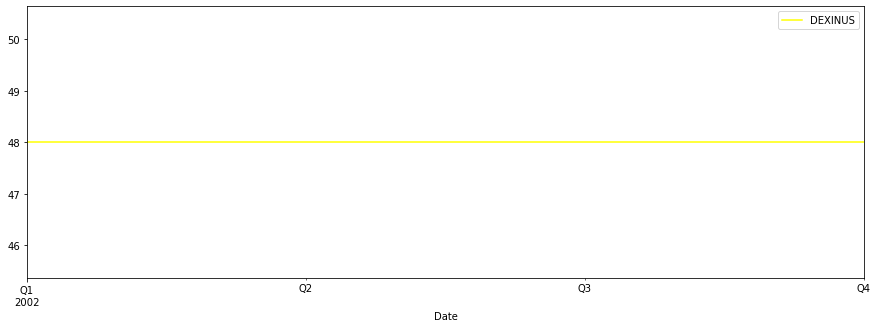

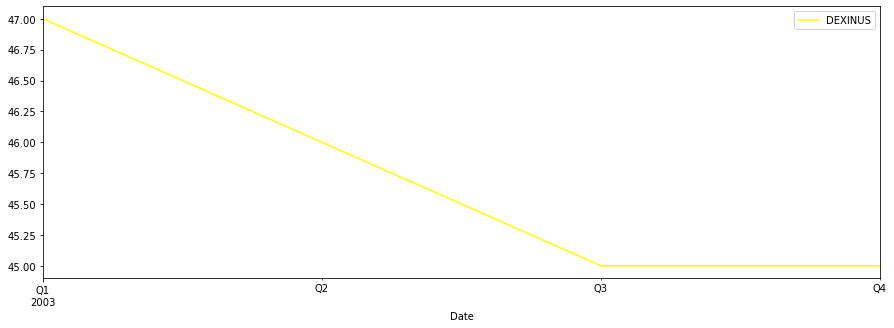

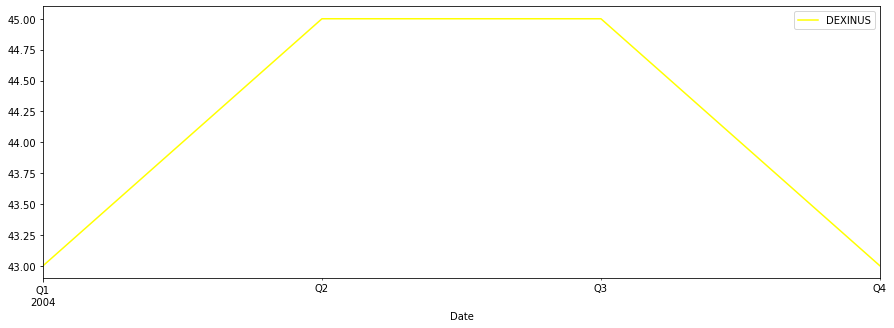

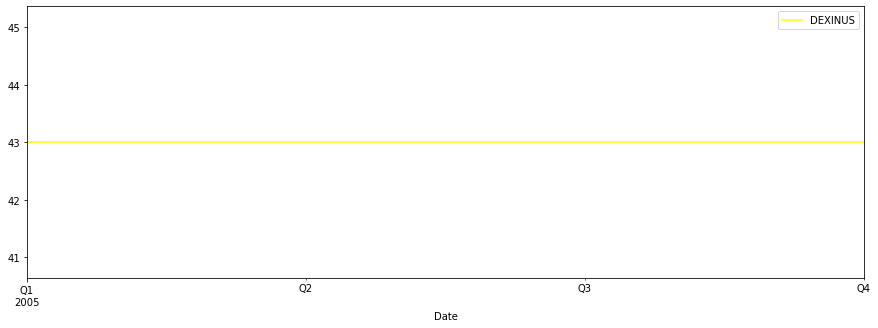

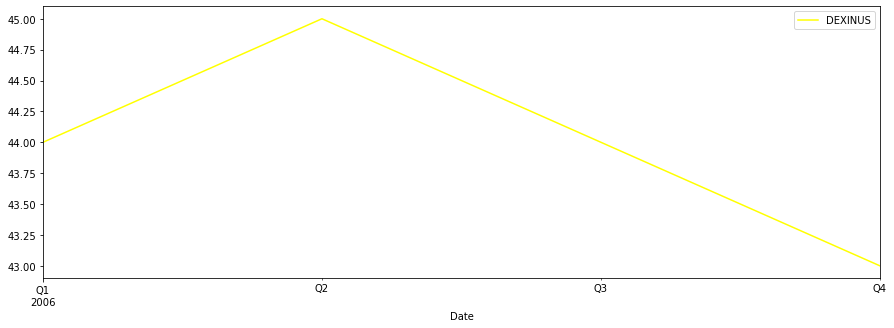

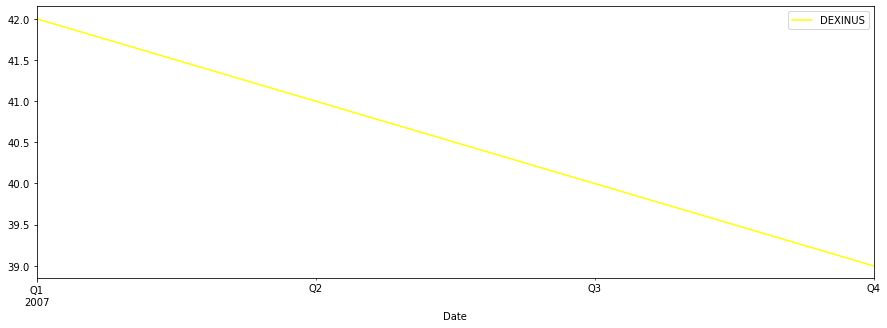

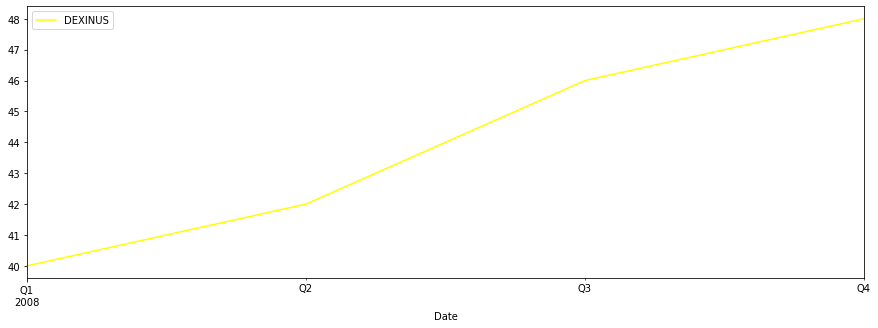

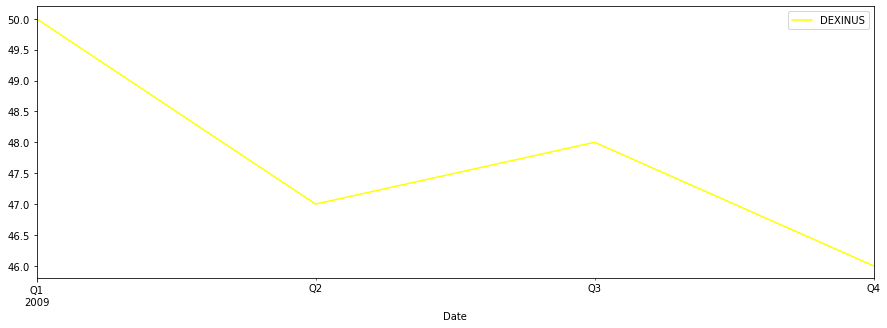

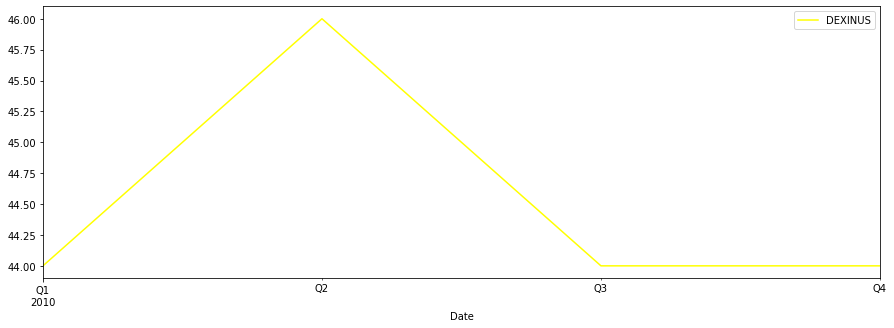

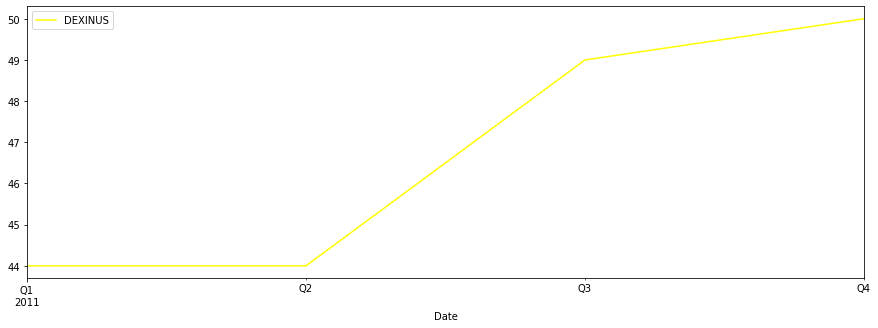

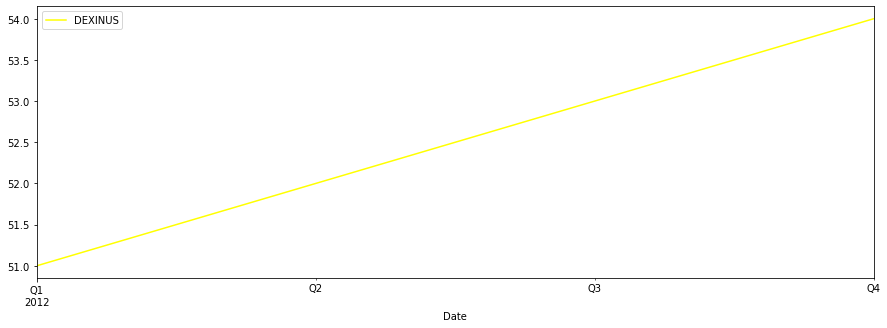

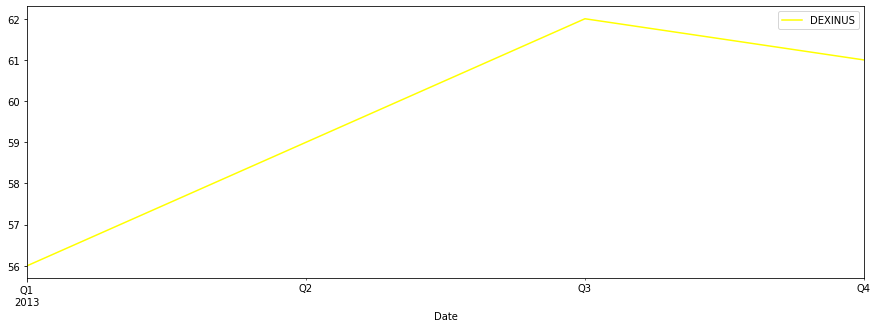

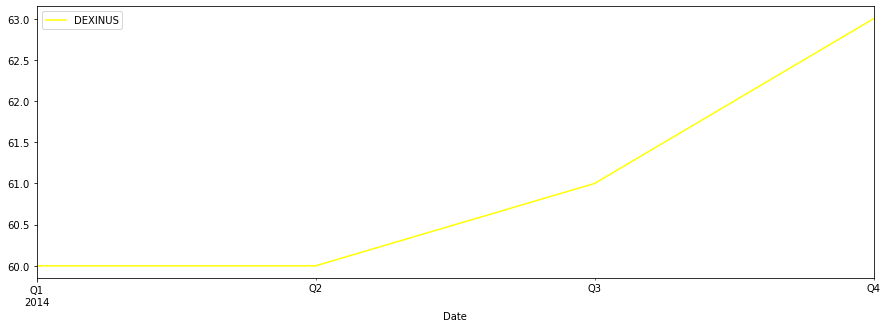

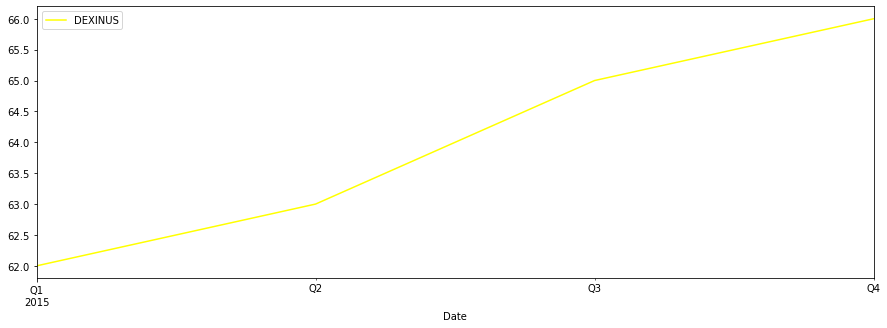

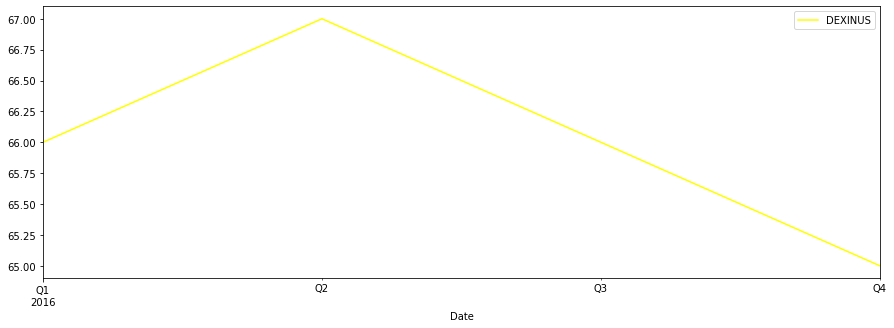

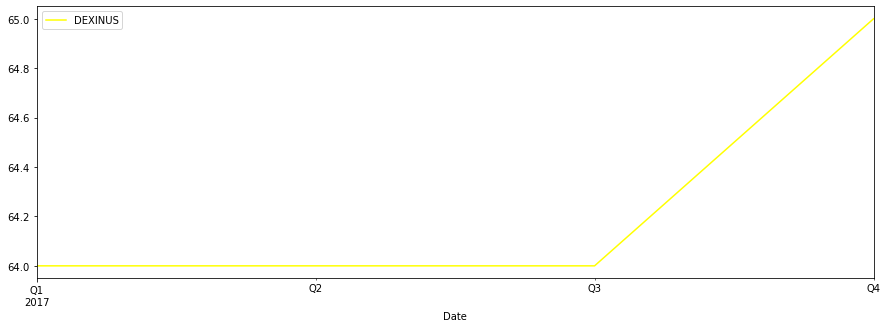

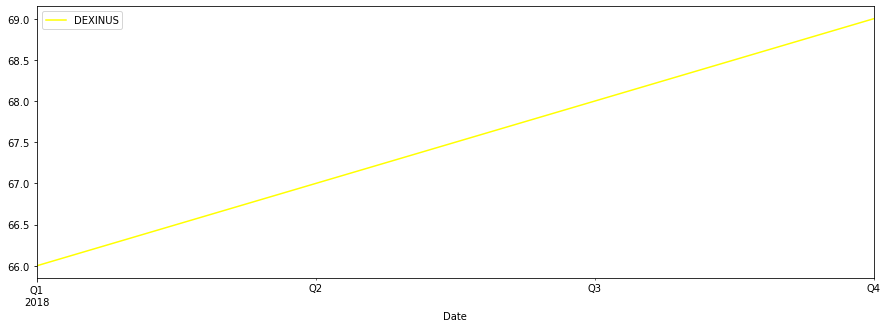

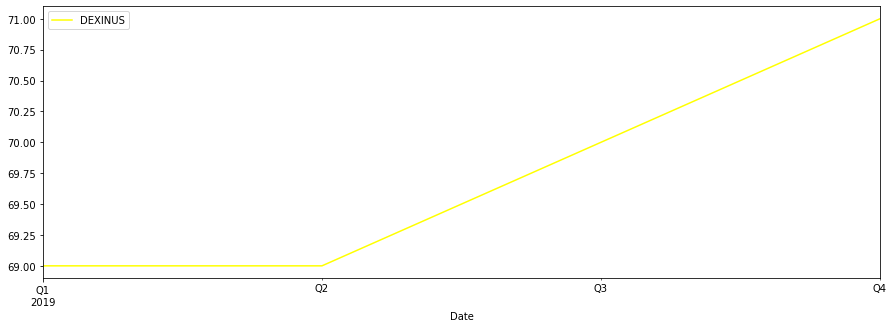

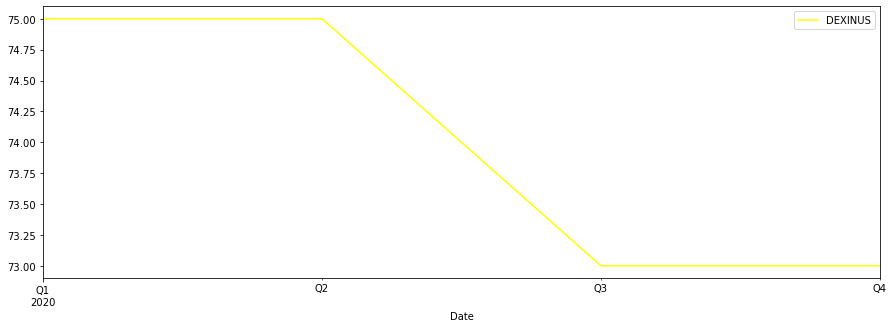

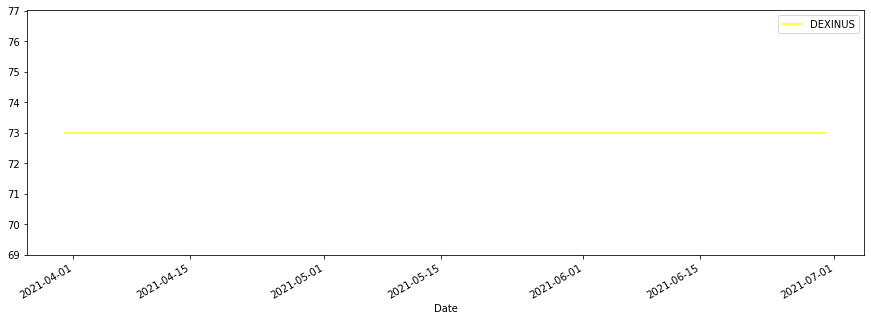

In [128]:
for x in range(0,49):
    z[x].plot(color='yellow',figsize=(15,5))
    plt.show()

In [129]:
upsampled = df_new.resample('Y')
data_y = upsampled.interpolate(method='linear')
data_y

,DEXINUS
Date,
1973-12-31,8.000000
1974-12-31,8.000000
1975-12-31,8.000000
1976-12-31,8.000000
1977-12-31,8.000000
1978-12-31,8.000000
1979-12-31,8.000000
1980-12-31,7.000000
1981-12-31,9.000000


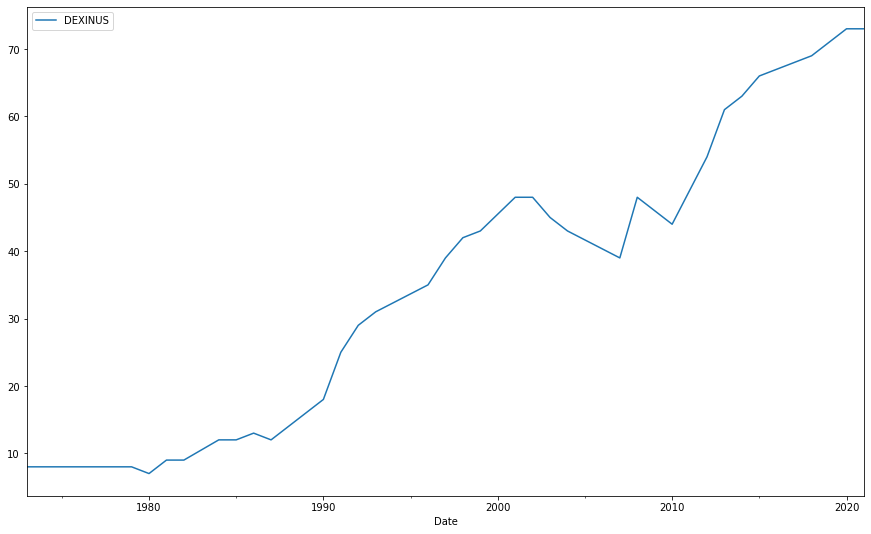

In [132]:
data_y.plot(figsize=(15,9))

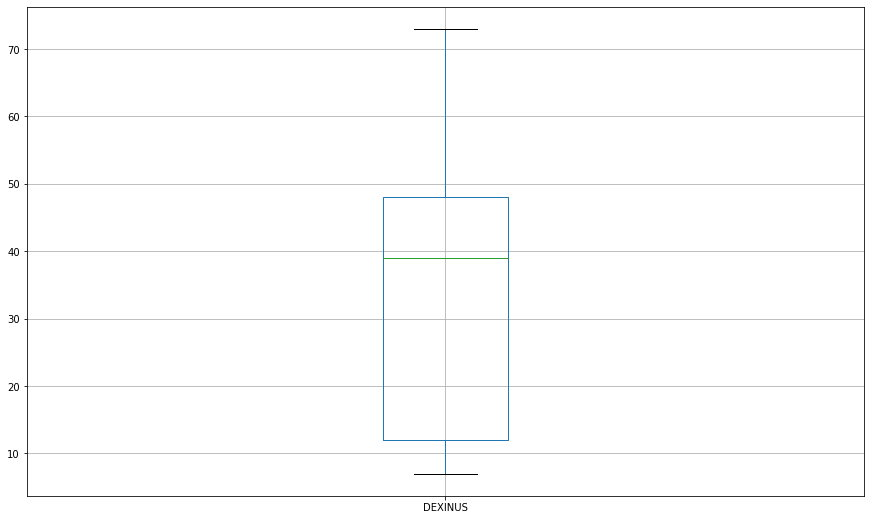

In [133]:
data_y.boxplot(figsize=(15,9))

In [136]:
df

,DEXINUS,year
Date,,
1973-01-02,8,1973
1973-01-03,8,1973
1973-01-04,8,1973
1973-01-05,8,1973
1973-01-08,8,1973
...,...,...
2021-06-21,74,2021
2021-06-22,74,2021
2021-06-23,74,2021


In [138]:
data_d=df.drop(['year'],axis=1)

In [139]:
data_d

,DEXINUS
Date,
1973-01-02,8
1973-01-03,8
1973-01-04,8
1973-01-05,8
1973-01-08,8
...,...
2021-06-21,74
2021-06-22,74
2021-06-23,74


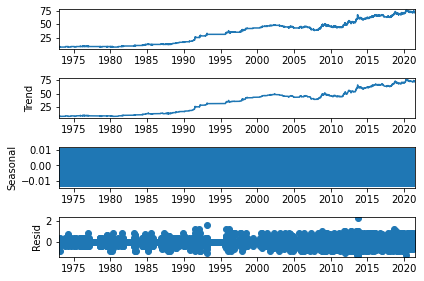

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_d, model='additive')
result.plot()
plt.show()